# My Evaluation

Let's import labs that we may need

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization 
import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import math
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
df.shape


(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
test['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [6]:
df.head(10).style.background_gradient(cmap = 'viridis')

In [7]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [8]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [9]:
df.describe().transpose().style.background_gradient(cmap = 'magma')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

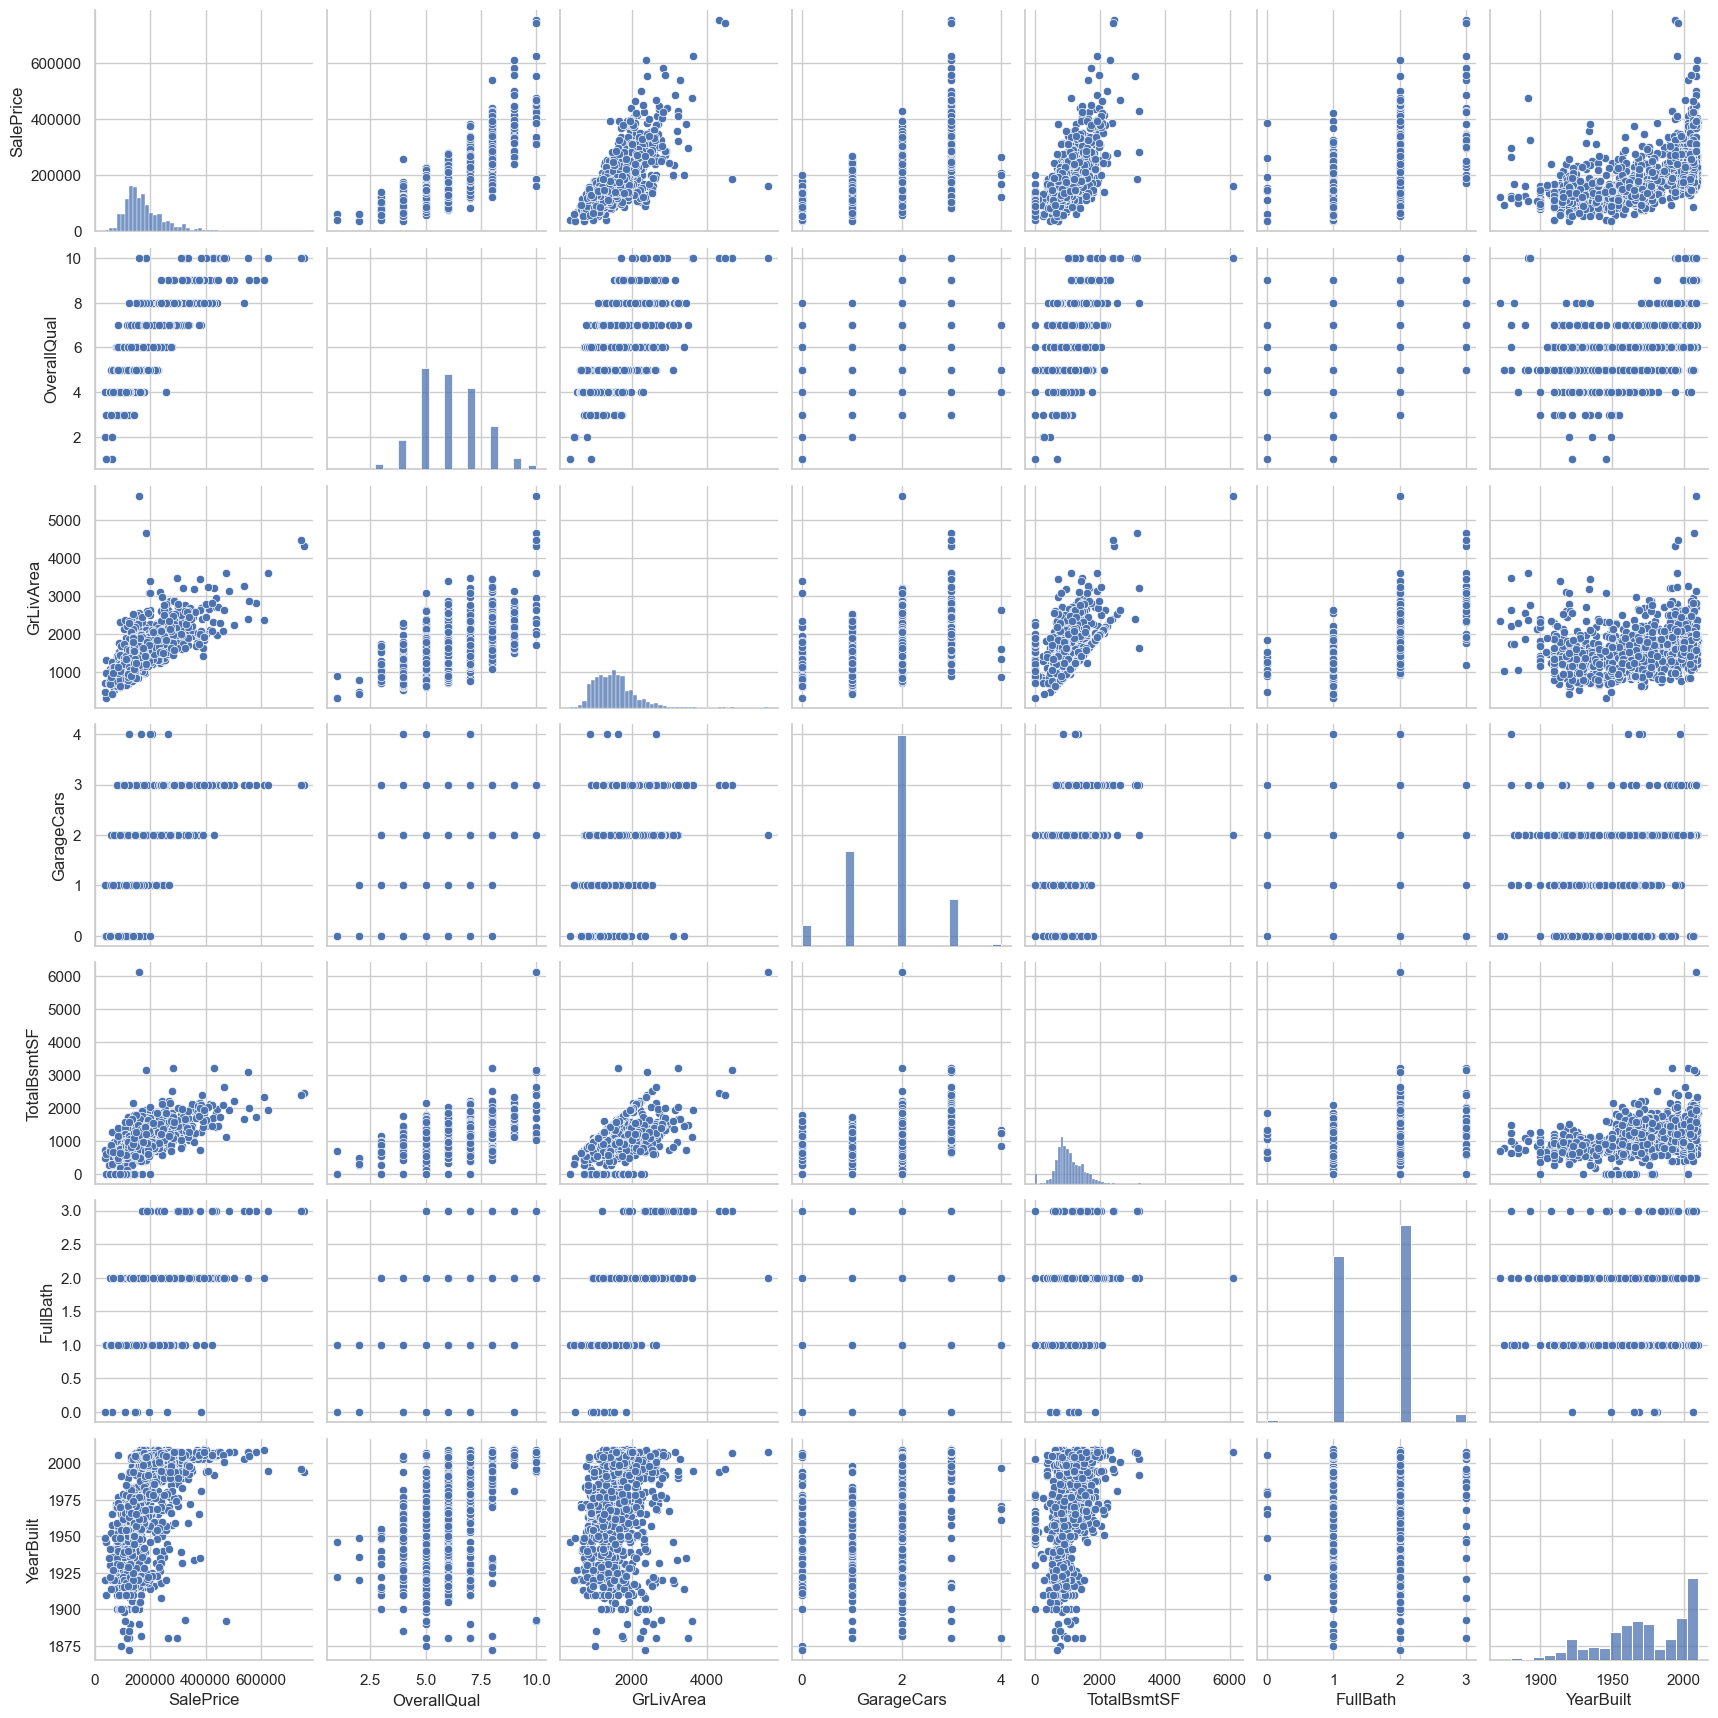

In [11]:
var_num = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(df[var_num])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

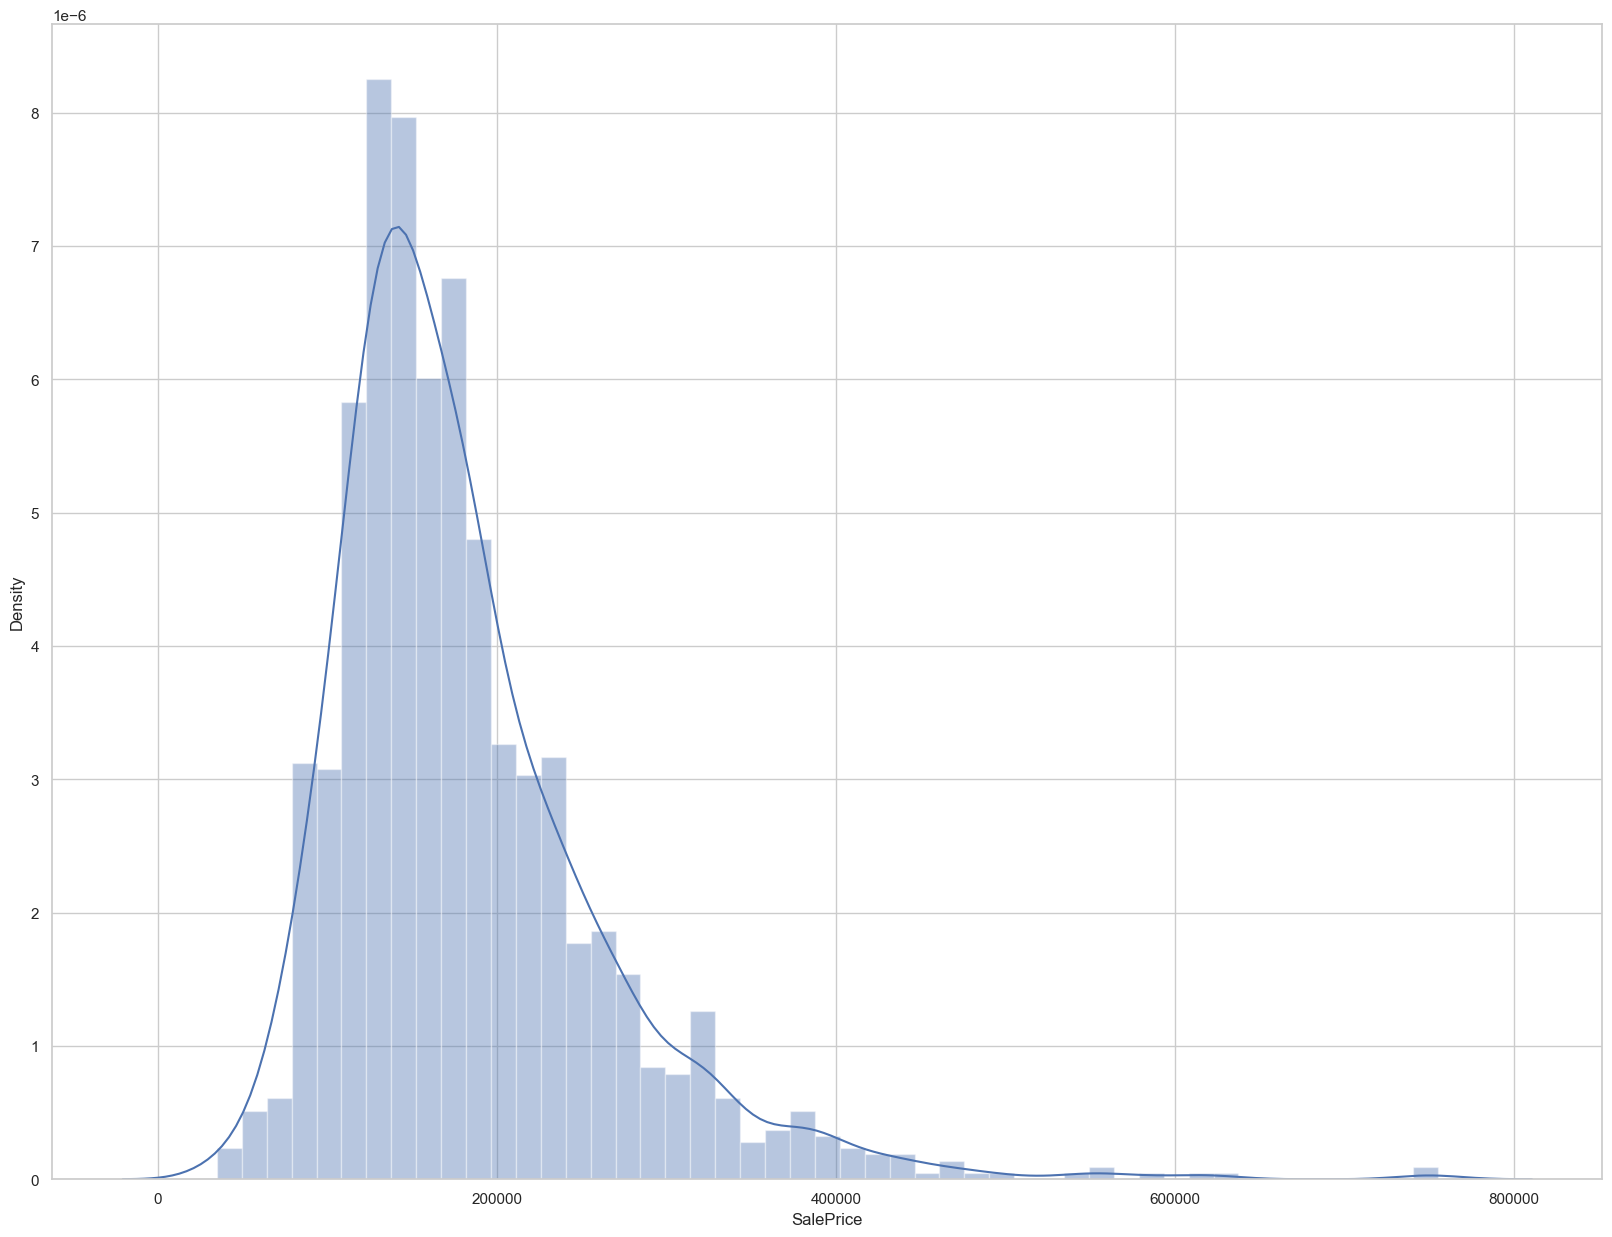

In [12]:
sns.distplot(df['SalePrice'])

In [13]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='LogSalePrice', ylabel='Density'>

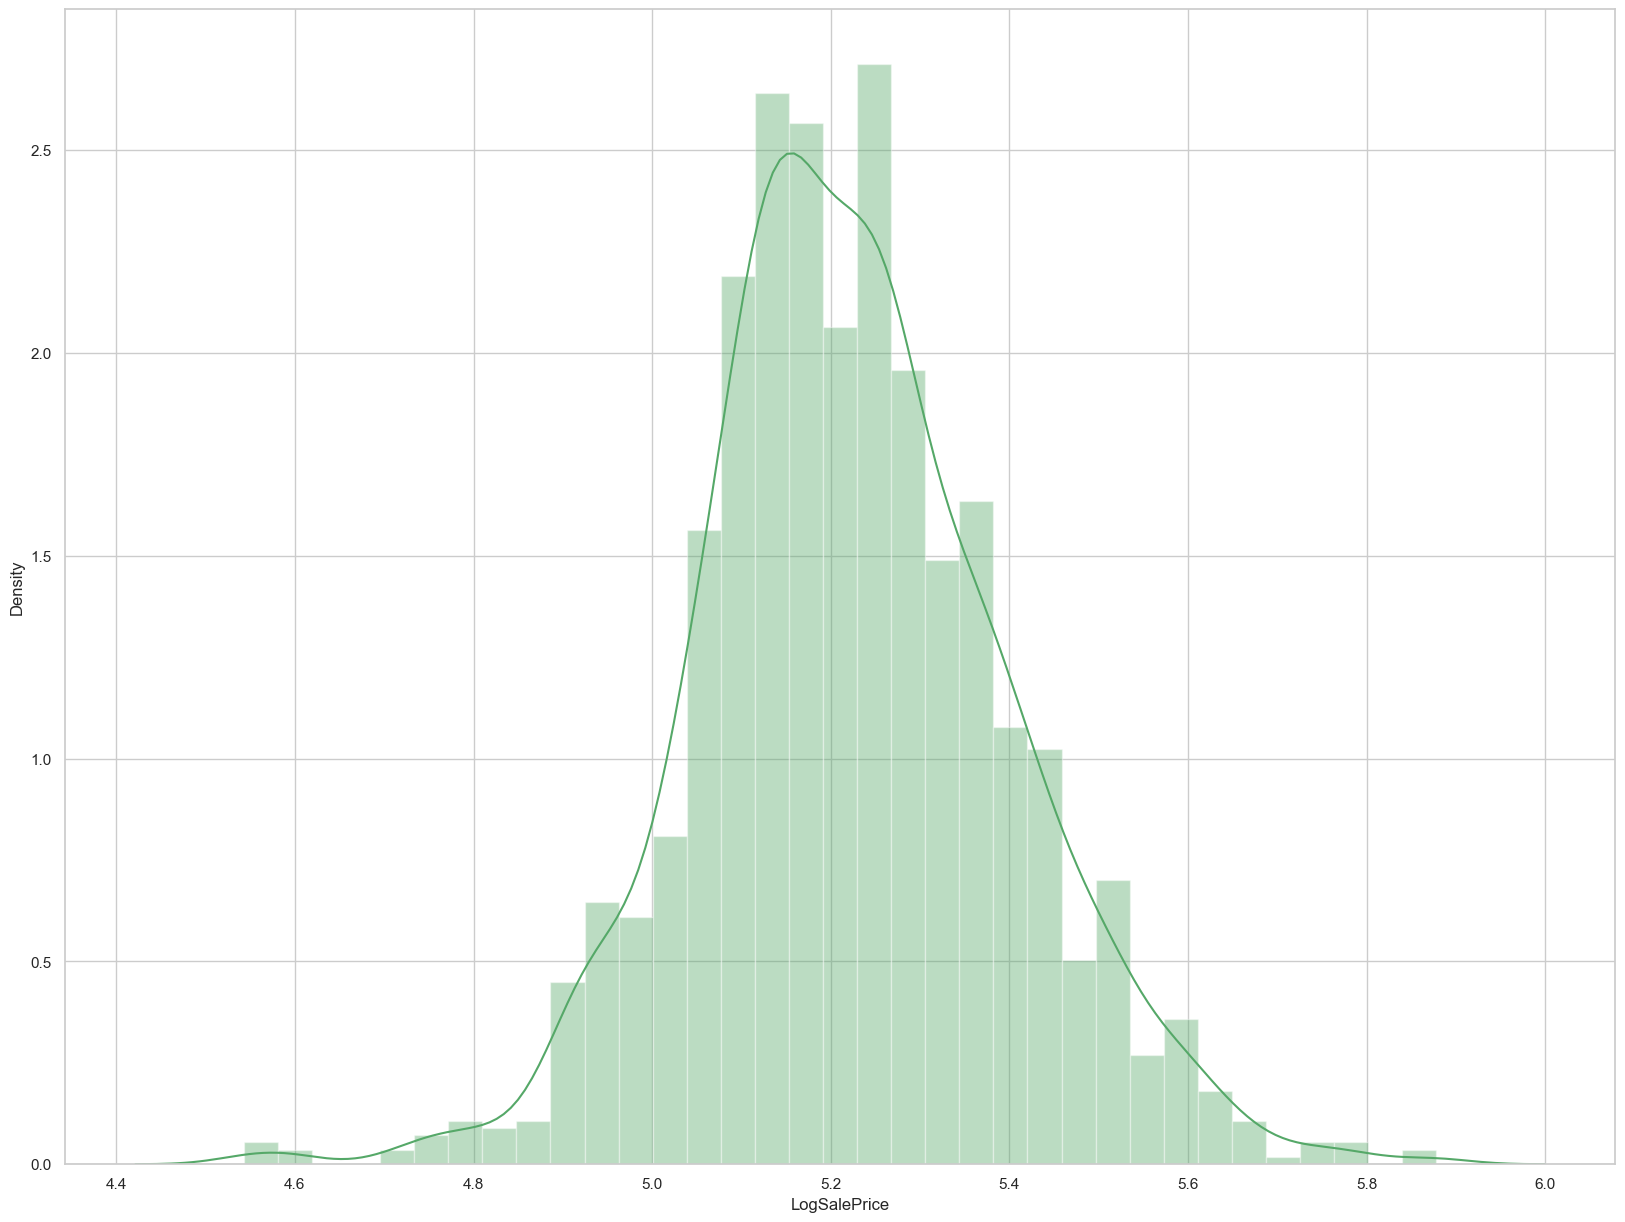

In [14]:
df['LogSalePrice'] = np.log10(df['SalePrice'])
sns.distplot(df['LogSalePrice'], color = 'g')

In [15]:
df = df.drop(['LogSalePrice'], axis = 1)

In [16]:
# No duplicated data
df.duplicated().sum()

0

In [17]:
pd.options.display.max_rows = None ## Shows all rows, needs to be resetted after
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [18]:
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [19]:
#resetting the options for 'max_rows'
pd.reset_option('max_rows')

# Missing values handling

### Let's group and see each columns % of missing values

In [20]:
dfna = df[df.columns[df.isna().any()].tolist()]
a = dfna.isnull().sum()/len(df)*100
a.sort_values(ascending = False, inplace = True)
a

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

# Let's check, which column values are numeric, to help us further develop data missing values handling strategy

We make a list of only numeric features

In [21]:
num = df.select_dtypes(include='number')
numdf = num.columns
numdf

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Let's make a list of numeric and a list of object like data

In [22]:
numeric = []
objects = []

for i in a.index:
    if i in numdf:
        numeric.append(i)
    else:
        objects.append(i)
print('List of numeric column values: ', numeric)
print('List of objects column values: ', objects)

List of numeric column values:  ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
List of objects column values:  ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']


## Well done! Now when our data is classifyed both by type and % of missing values, we can group those features and work with those values
Let's work with first 80% missing data features

Since it's more than 80 percent and data is not numerical, we can drop this features



In [23]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis = 1, inplace = True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis = 1, inplace = True)


### Let's work with LotFrontage column, since it's quite unique in range of missing values, while being a numerical feature

In [24]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

Checking it's distribution will be helpfull for us, so let's visualize it

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

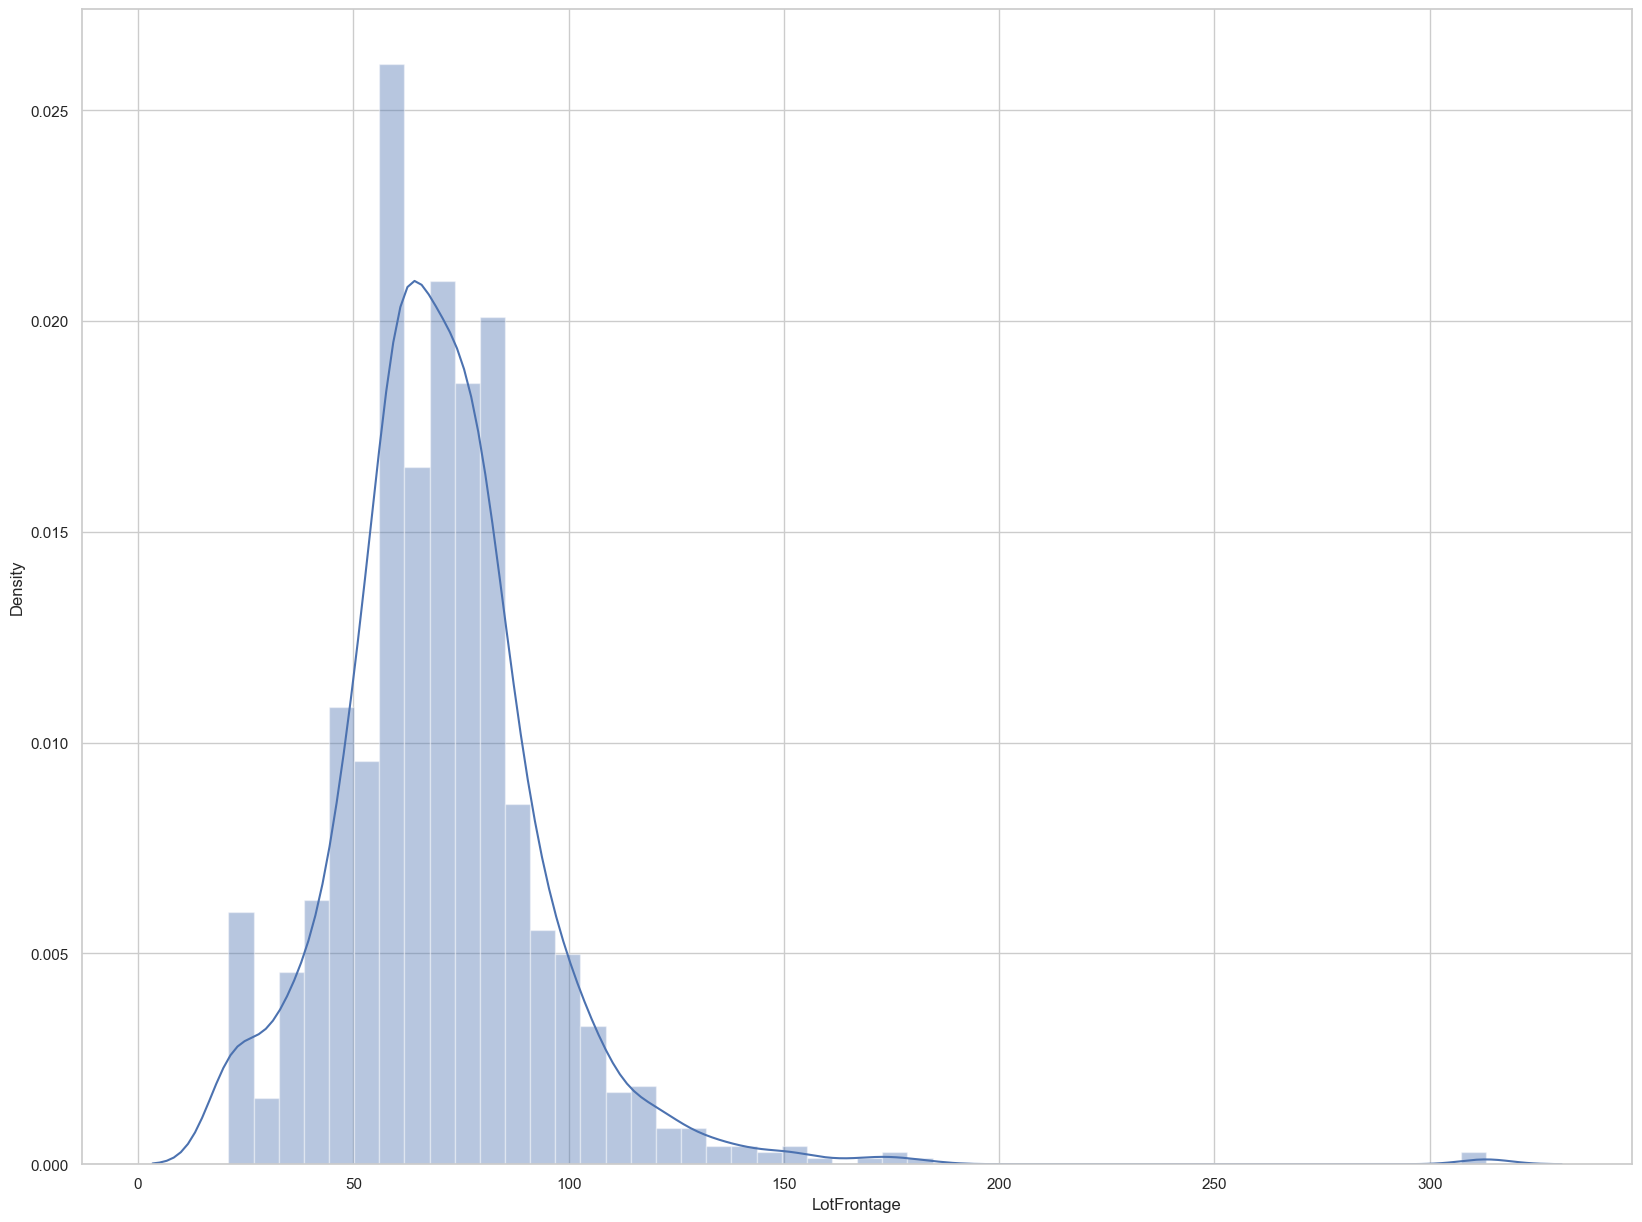

In [25]:
sns.distplot(df.LotFrontage)

 Getting the mean

In [26]:
df.LotFrontage.mean()

70.04995836802665

Checking the percentage of missing values

In [27]:
print('The percentage of missing data is:', df.LotFrontage.isnull().sum()/len(df)*100 , '%')

The percentage of missing data is: 17.73972602739726 %


### Now let's replace missing values with mean, since the percent of missing values is not very high

In [28]:
df.loc[df.LotFrontage.isnull() == True, 'LotFrontage'] = 70.04995836802665
df.LotFrontage.isnull().sum()
test.loc[test.LotFrontage.isnull() == True, 'LotFrontage'] = 70.04995836802665

## Time to get to GarageYrBlt, since it's numerical, let's dive in


In [29]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

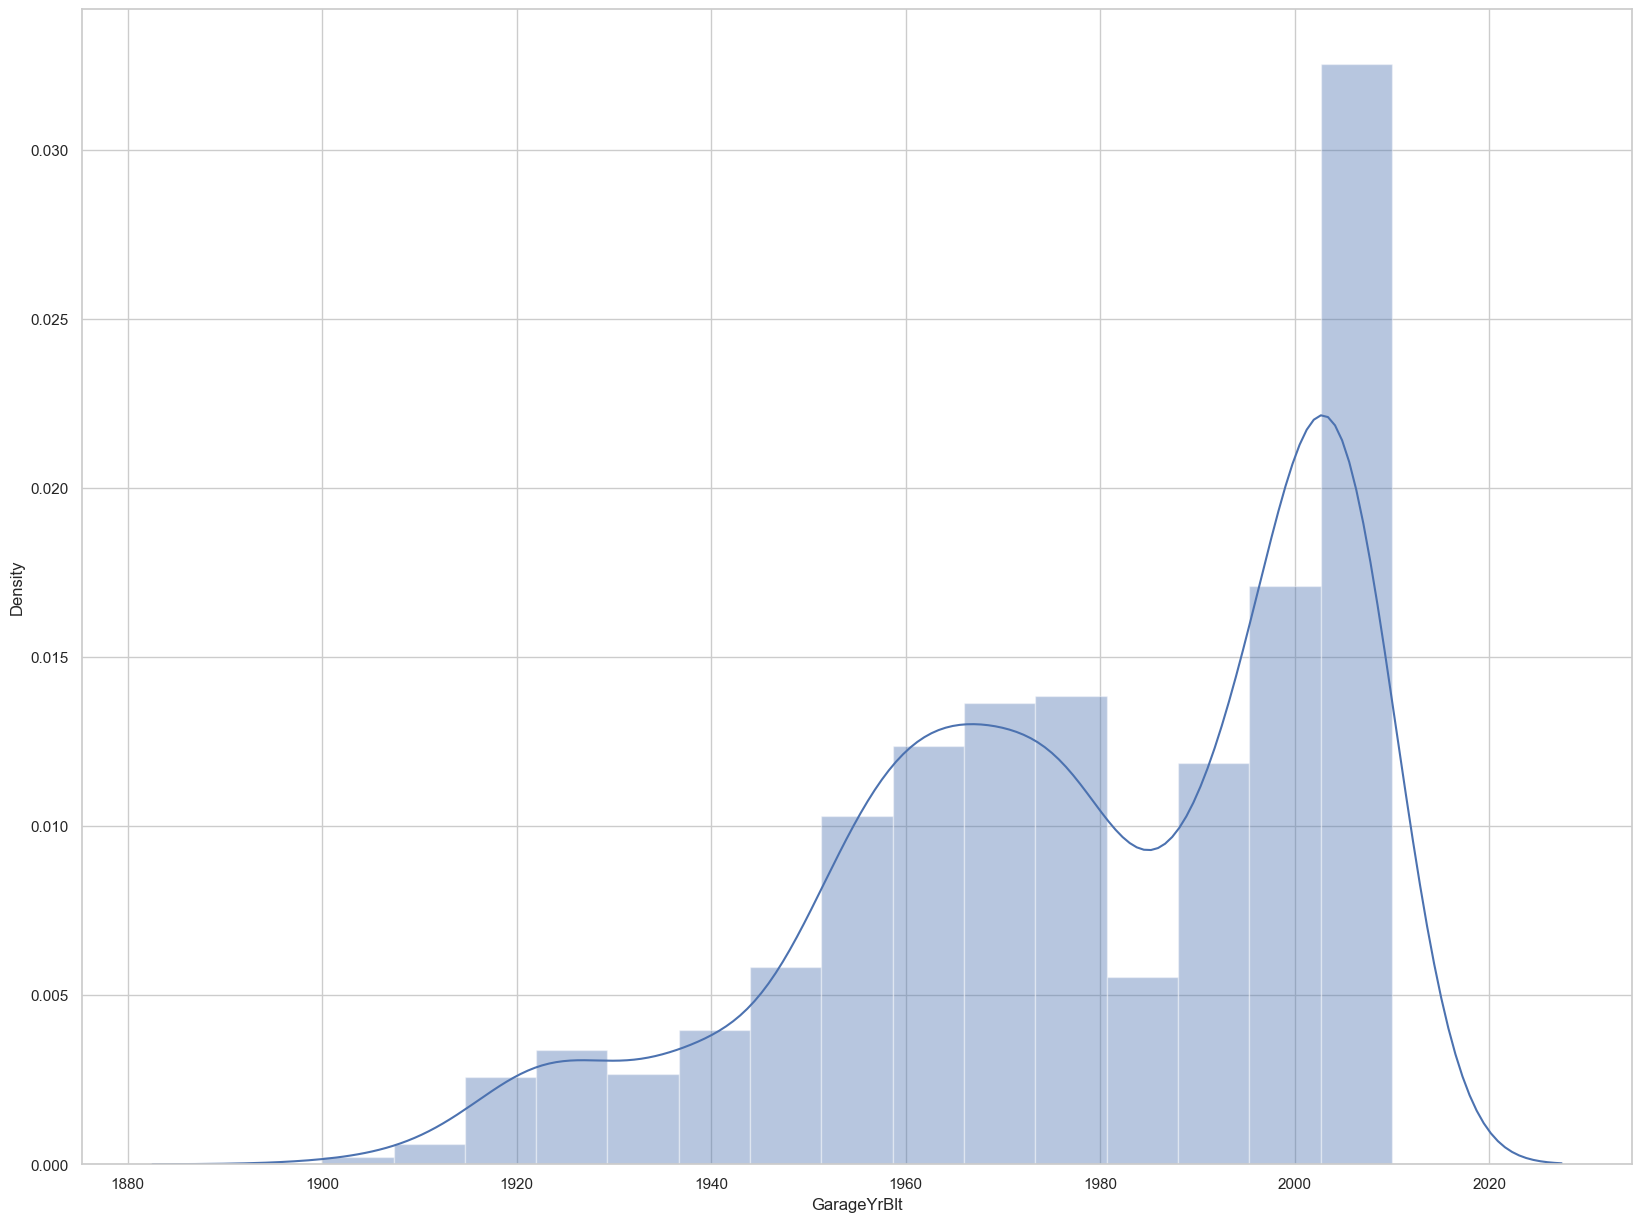

In [30]:
sns.distplot(df['GarageYrBlt'])

In [31]:
#Let's find mdeian value to fill the missing data
df['GarageYrBlt'].median()

1980.0

In [32]:
#Let's now replace the NaN with median of Garage Year Built
df['GarageYrBlt'].fillna(1980, inplace = True)
test['GarageYrBlt'].fillna(1980, inplace = True)

In [33]:
#Let's double check that we applied our changes and also dobule check our NaN values count
print(df.loc[df['GarageYrBlt'] == 1980]['GarageYrBlt'])
print(' Sum of NaN values is: ', df['GarageYrBlt'].isnull().sum())

39      1980.0
48      1980.0
78      1980.0
88      1980.0
89      1980.0
         ...  
1349    1980.0
1407    1980.0
1449    1980.0
1450    1980.0
1453    1980.0
Name: GarageYrBlt, Length: 96, dtype: float64
 Sum of NaN values is:  0


## Now let's deal with our last numerical feature 'MasVnrArea'

In [34]:
df['MasVnrArea'].isnull().sum()

8

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

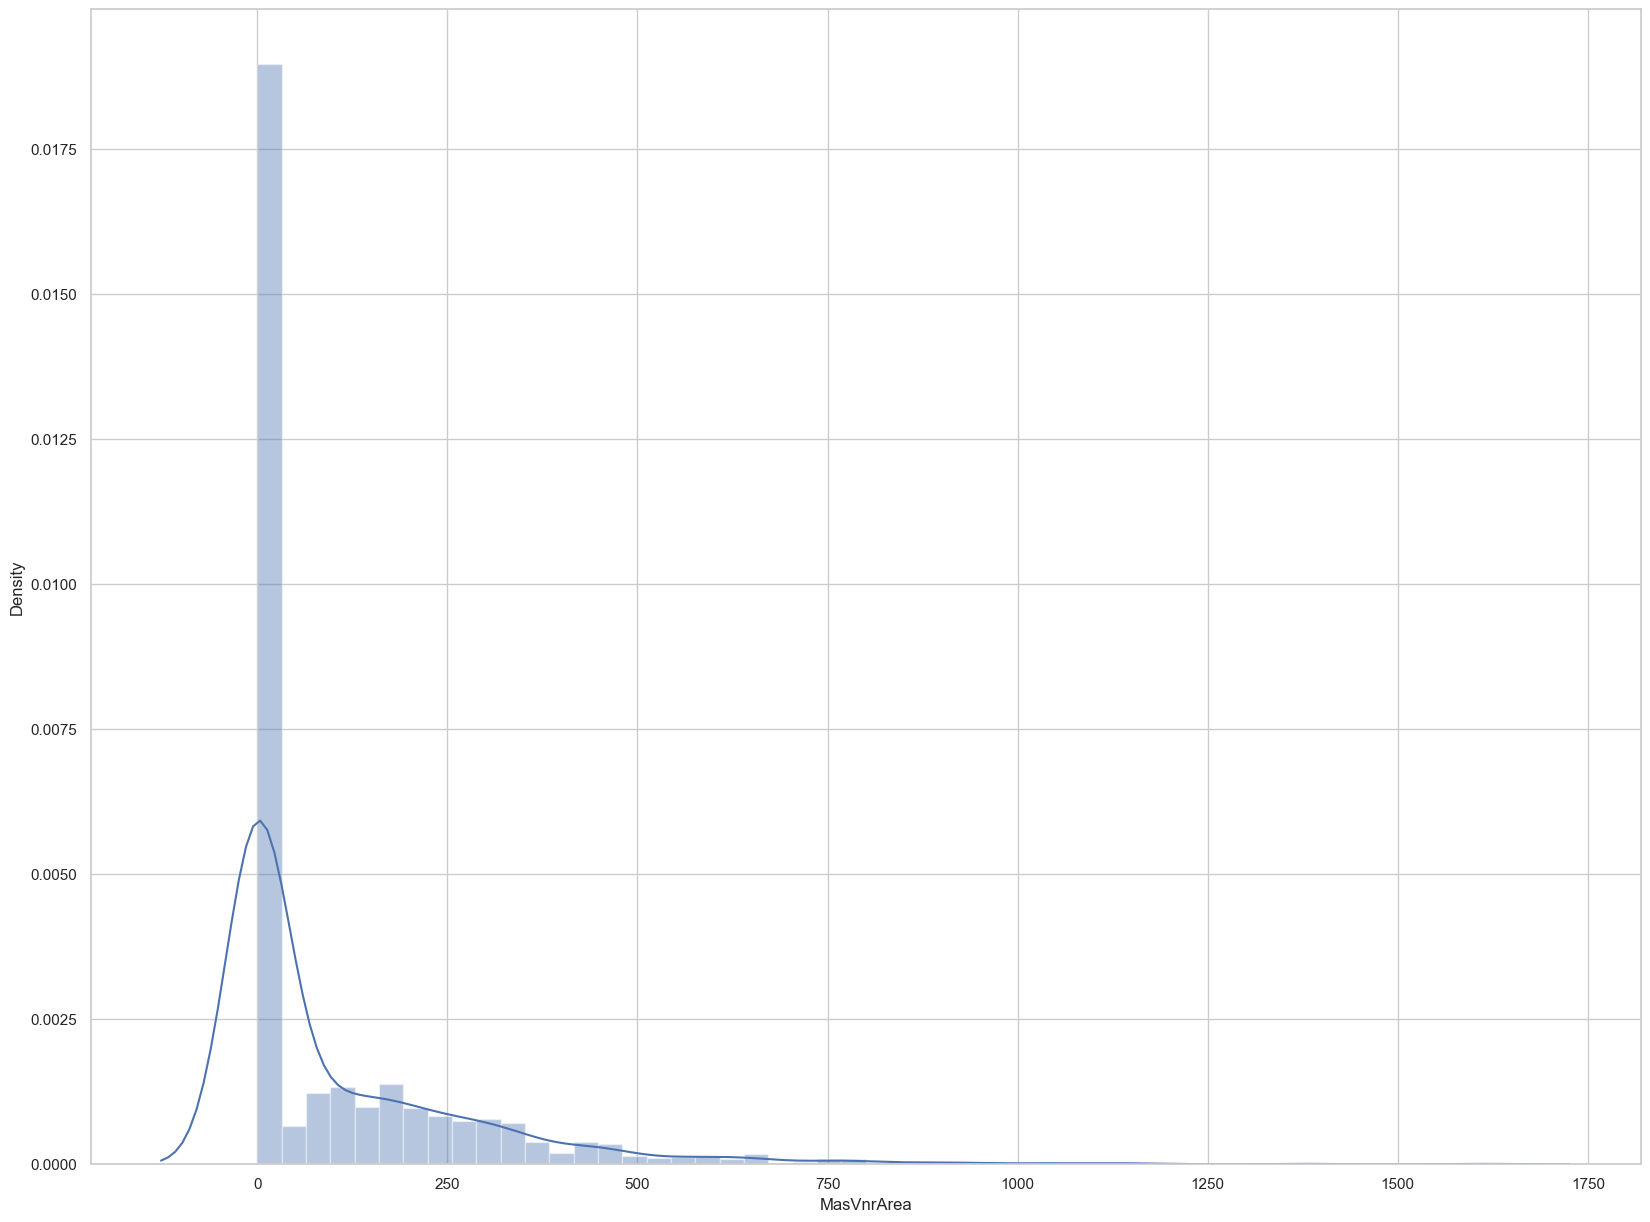

In [35]:
sns.distplot(df['MasVnrArea'])

In [36]:
df['MasVnrArea'].median()

0.0

## Important!

As we can see, the NaN values in MasVnrArea are located, where MasVnrType is 'NA', so it is equal to 0


In [37]:
df.loc[df['MasVnrArea'].isnull()]['MasVnrArea']
test.loc[test['MasVnrArea'].isnull()]['MasVnrArea']

231    NaN
246    NaN
422    NaN
532    NaN
544    NaN
581    NaN
851    NaN
865    NaN
880    NaN
889    NaN
908    NaN
1132   NaN
1197   NaN
1226   NaN
1402   NaN
Name: MasVnrArea, dtype: float64

In [38]:
#Let's replace NaN with 0 (which is also a median)
df.MasVnrArea.fillna(0, inplace = True)
test.MasVnrArea.fillna(0, inplace = True)

Let's check our results to make sure we are doing everything correct

In [39]:
df['MasVnrArea'].isnull().sum()
print(df['MasVnrArea'].isnull().sum())

0


## Let's deal with other non-  numerical data


Before we start, let's make distibution plots, to find outliers and develop a tactic on handling missing values in those features

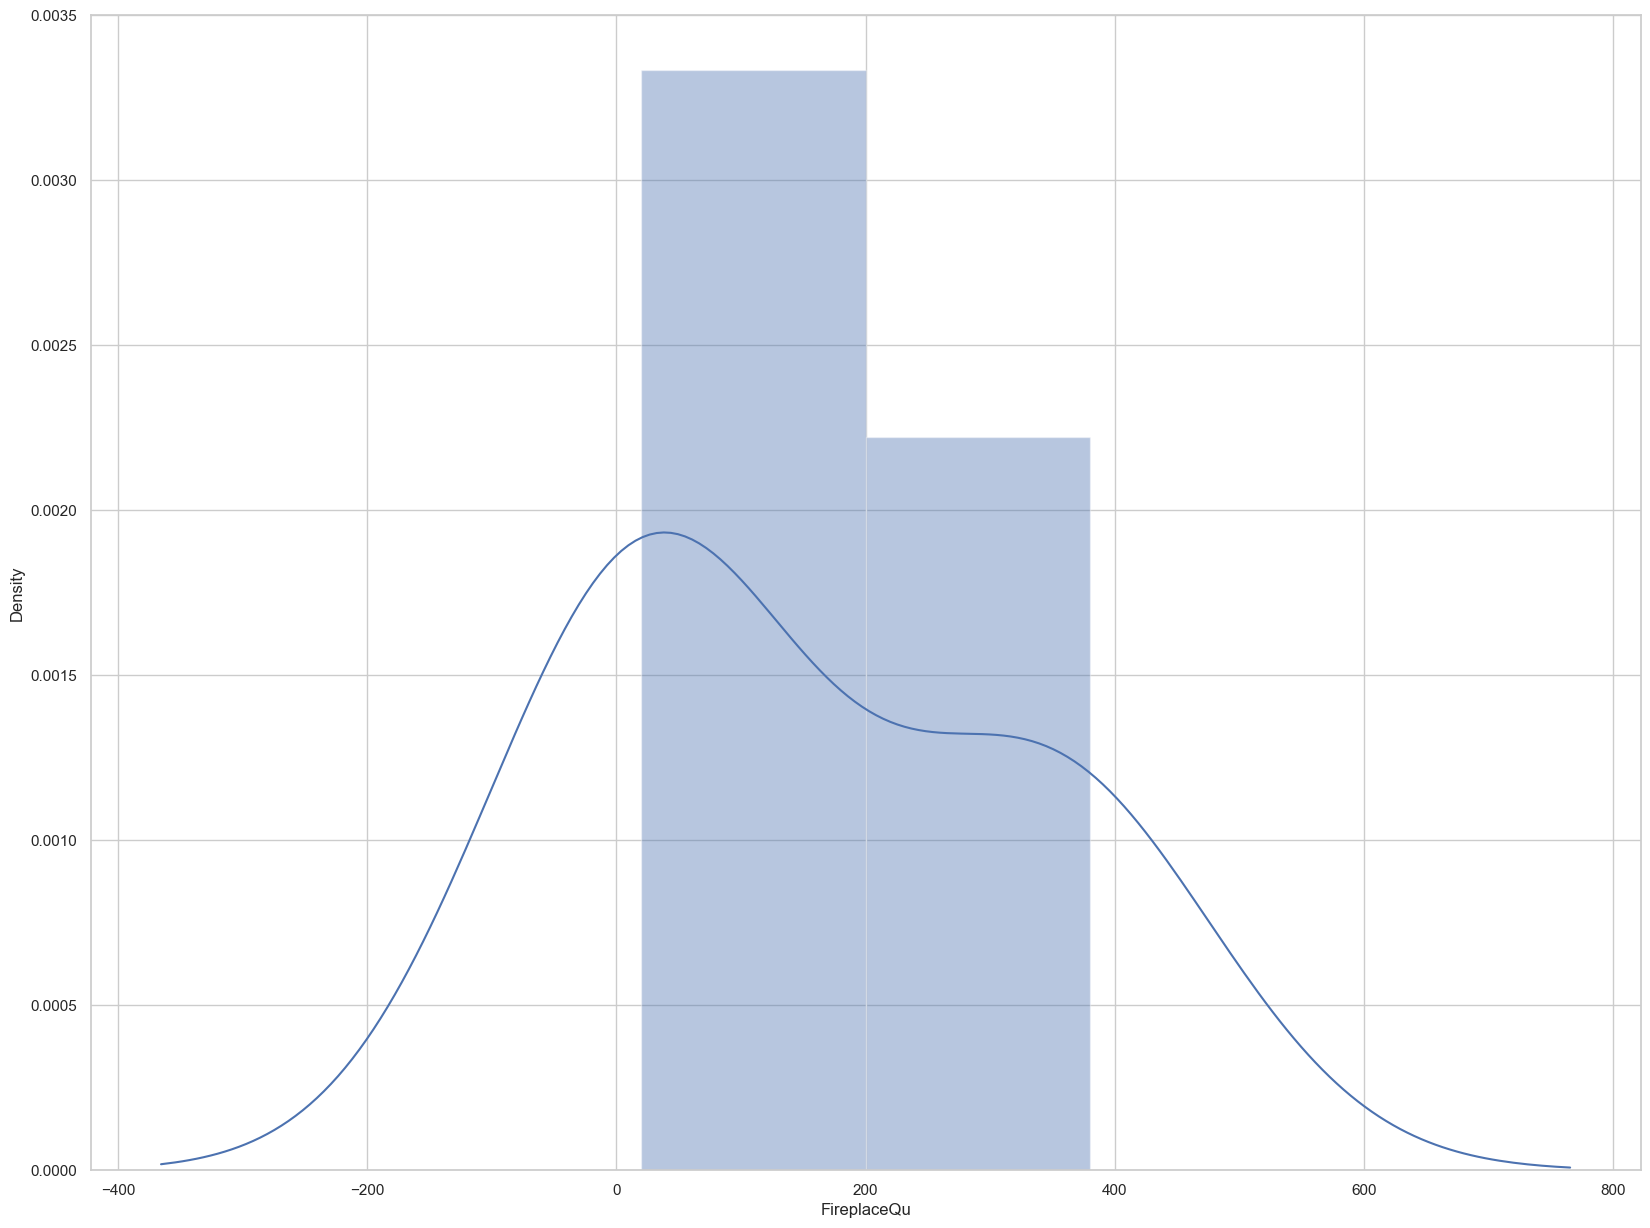

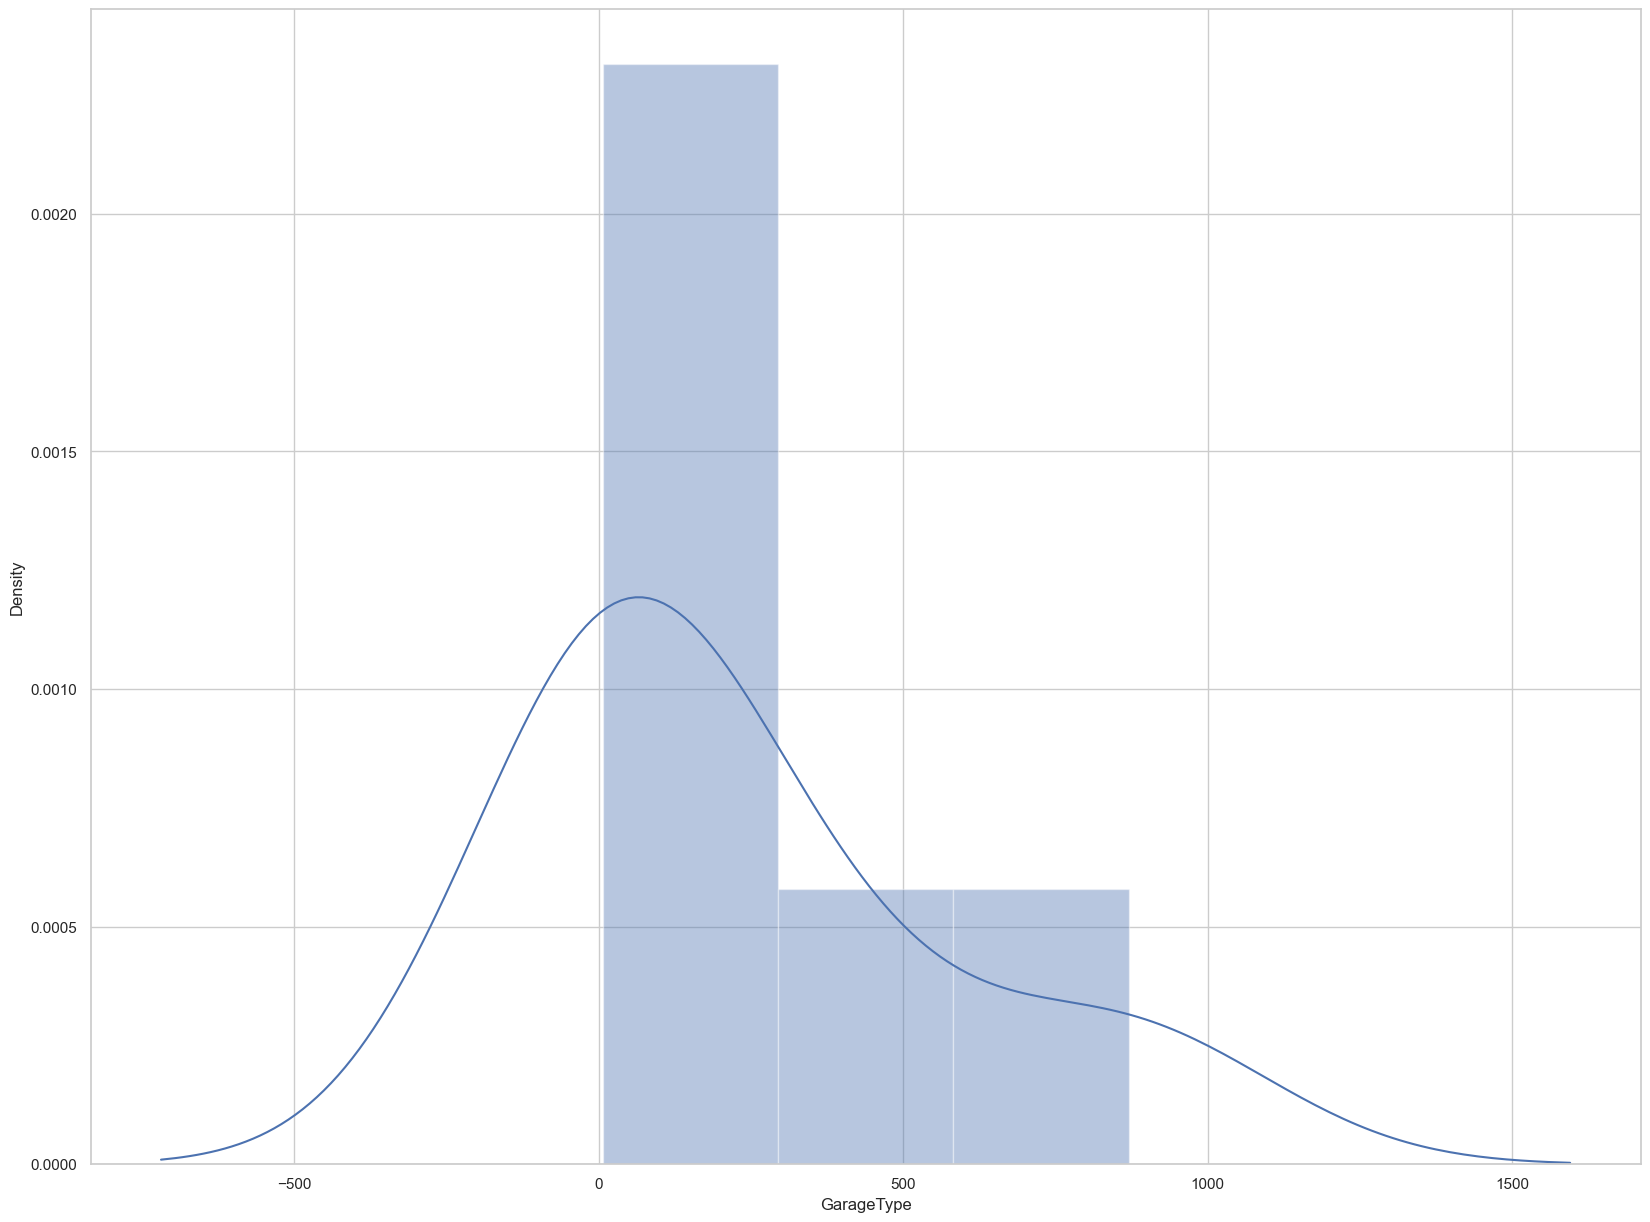

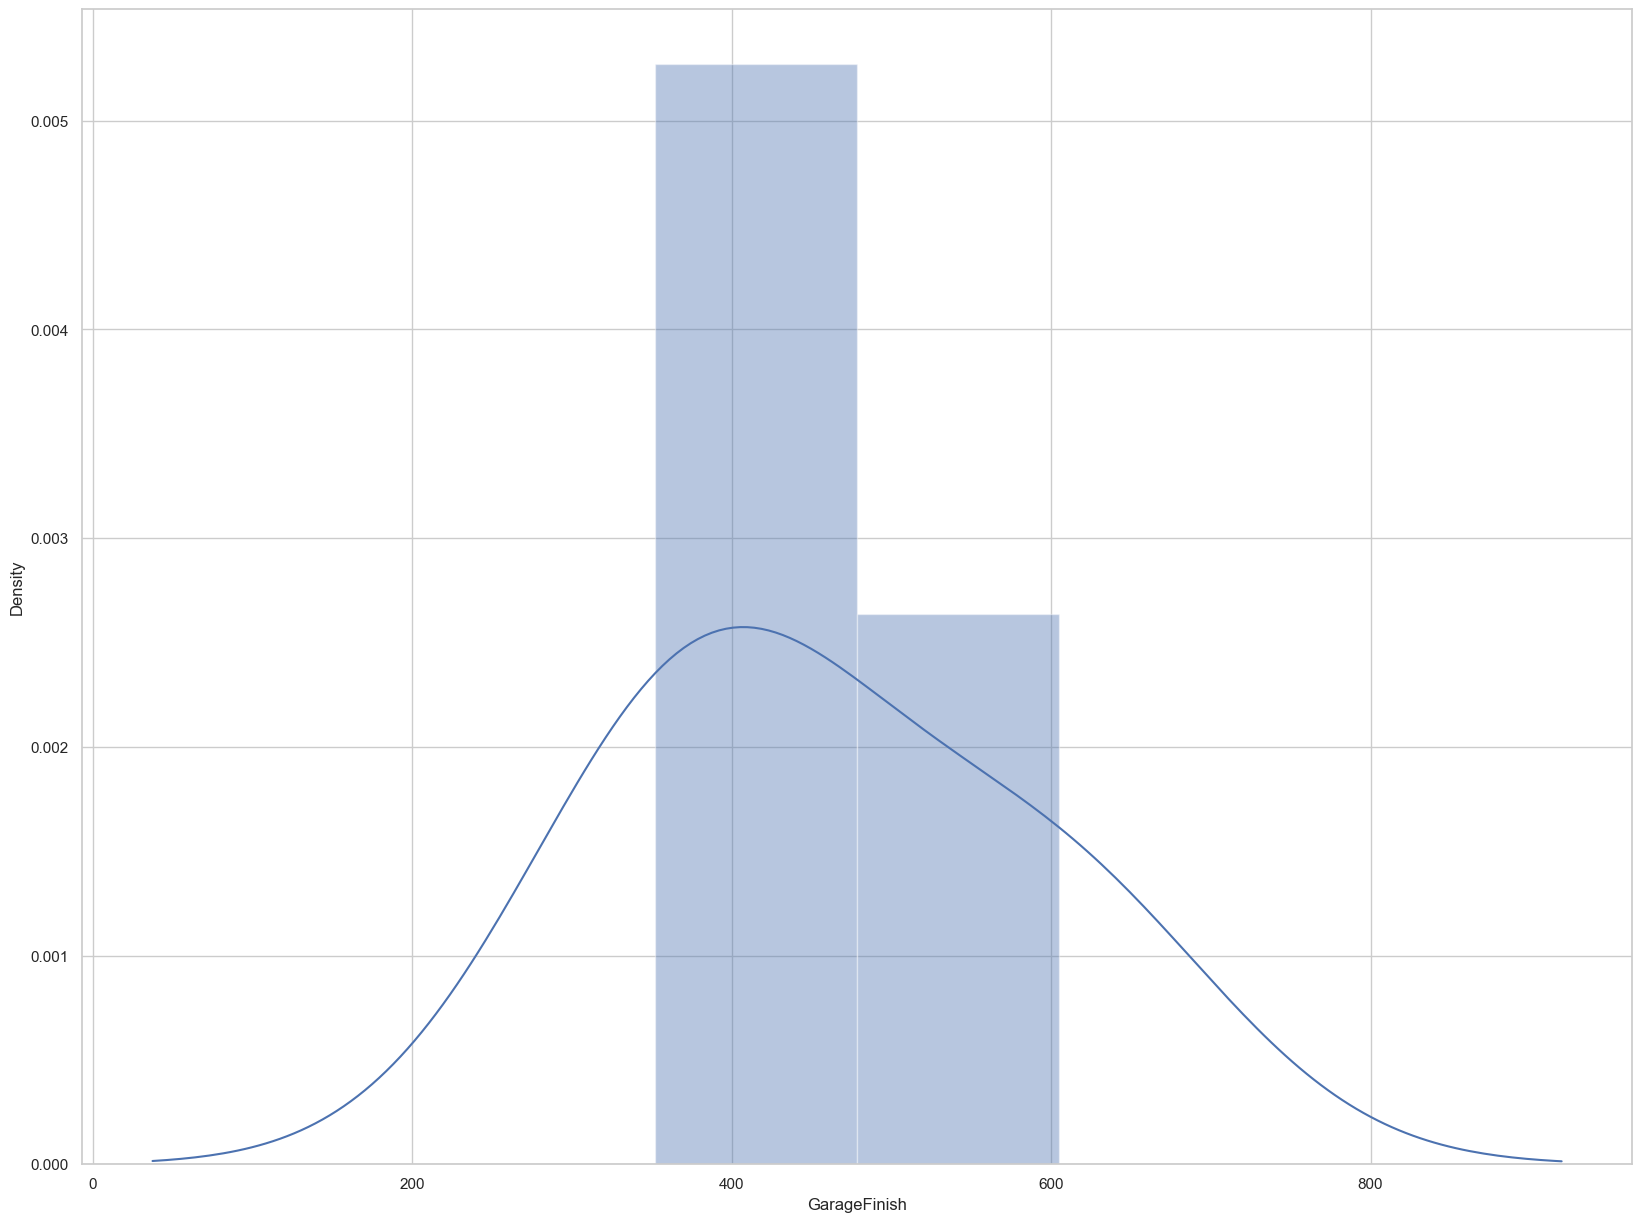

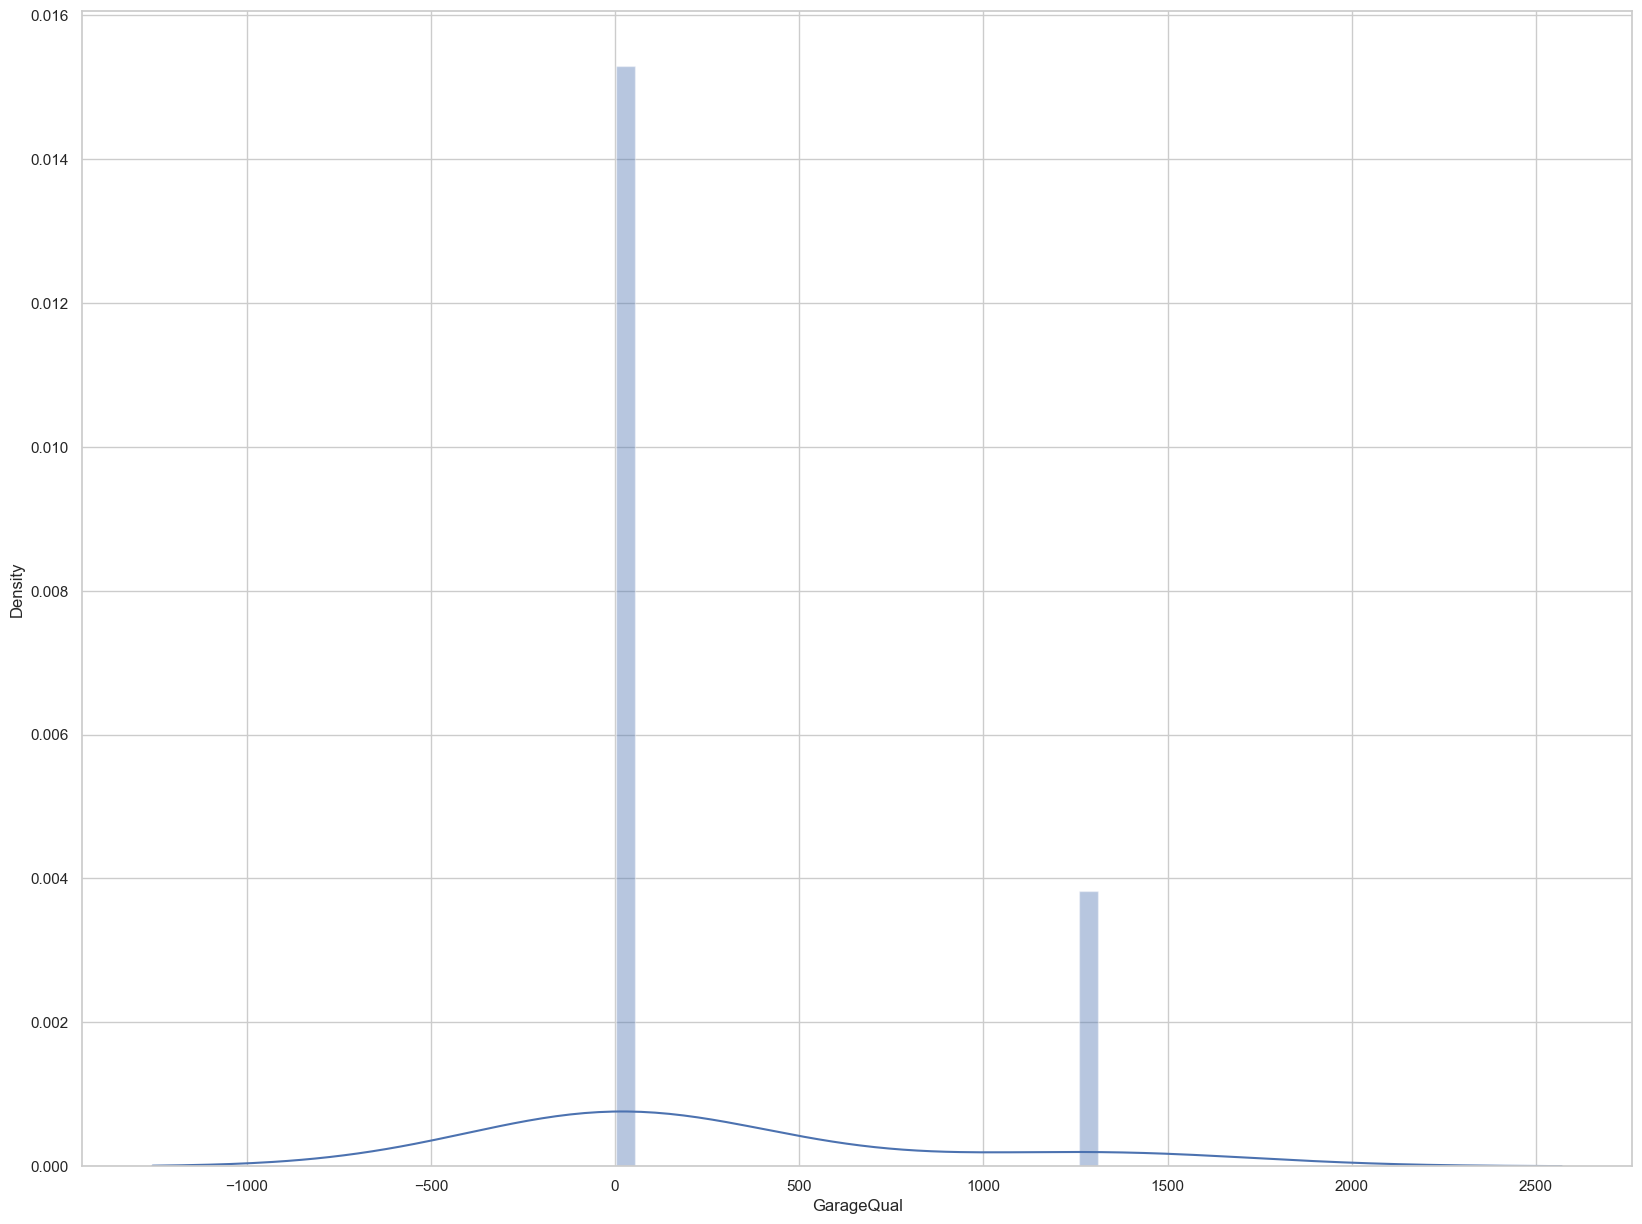

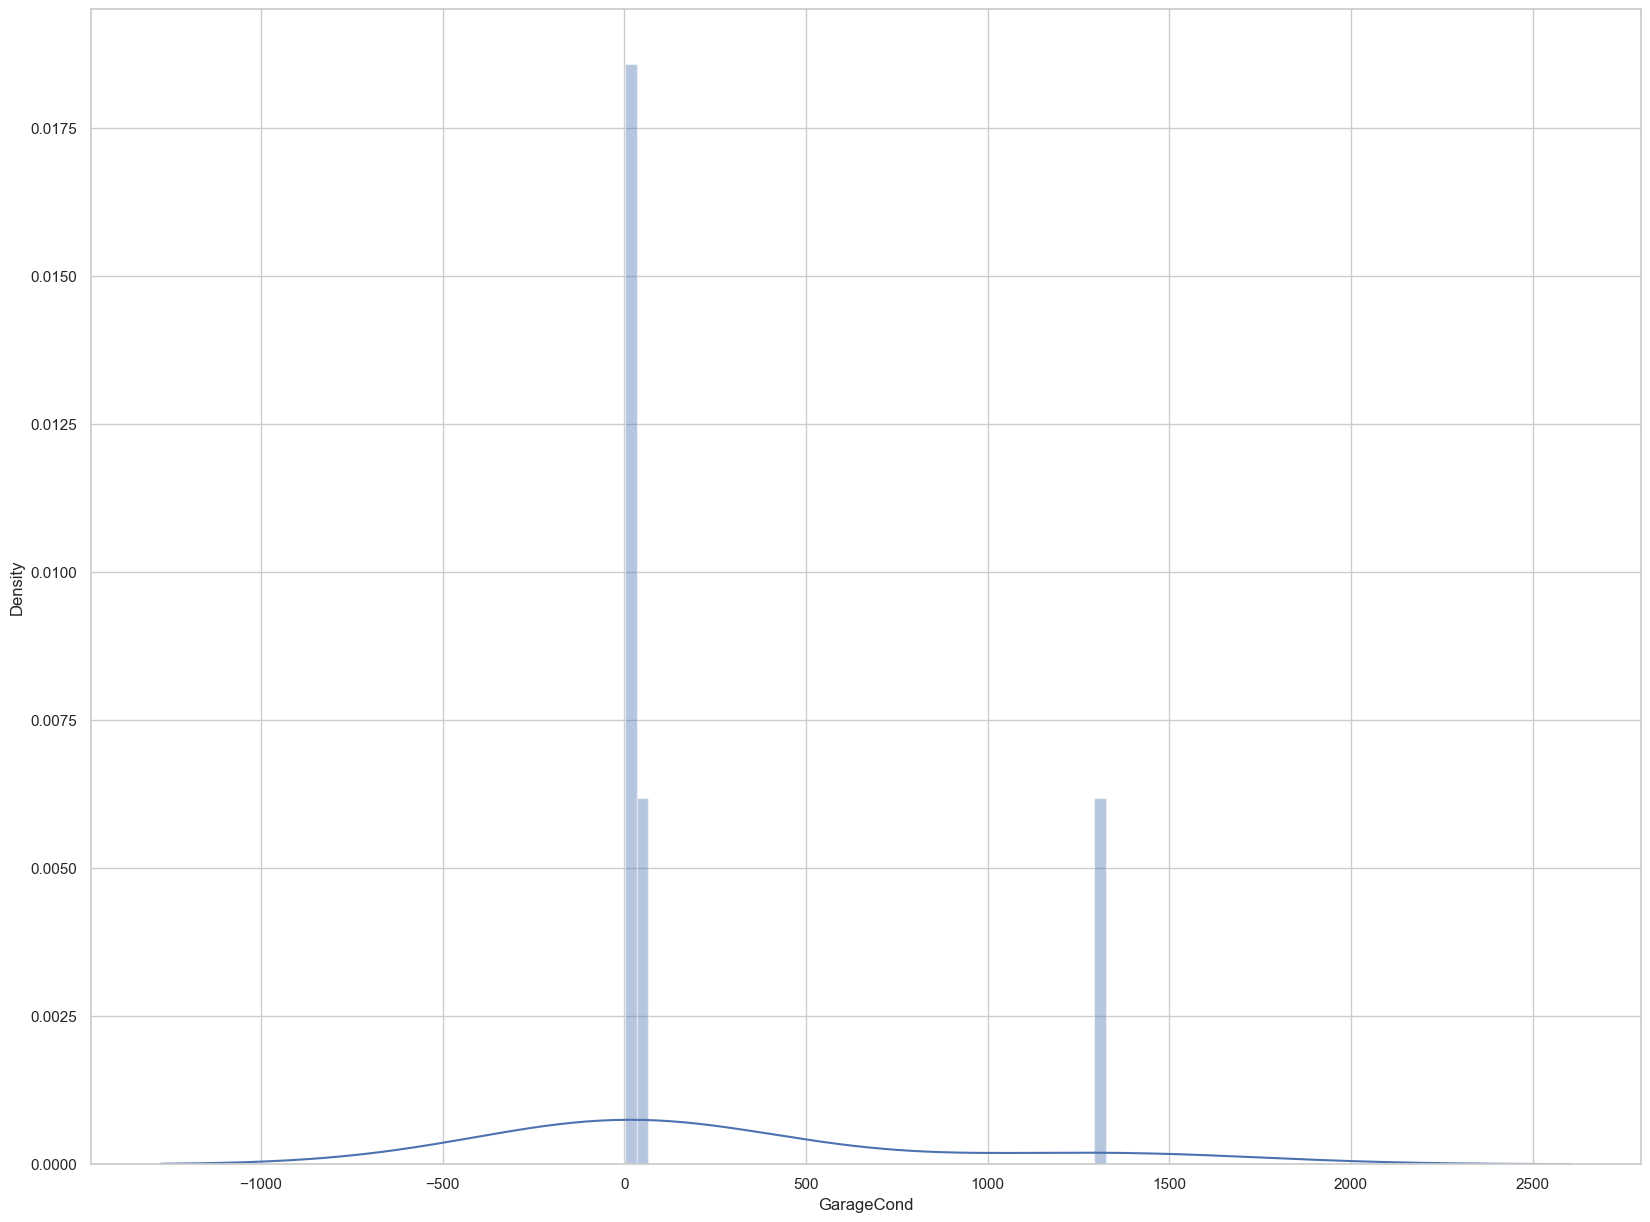

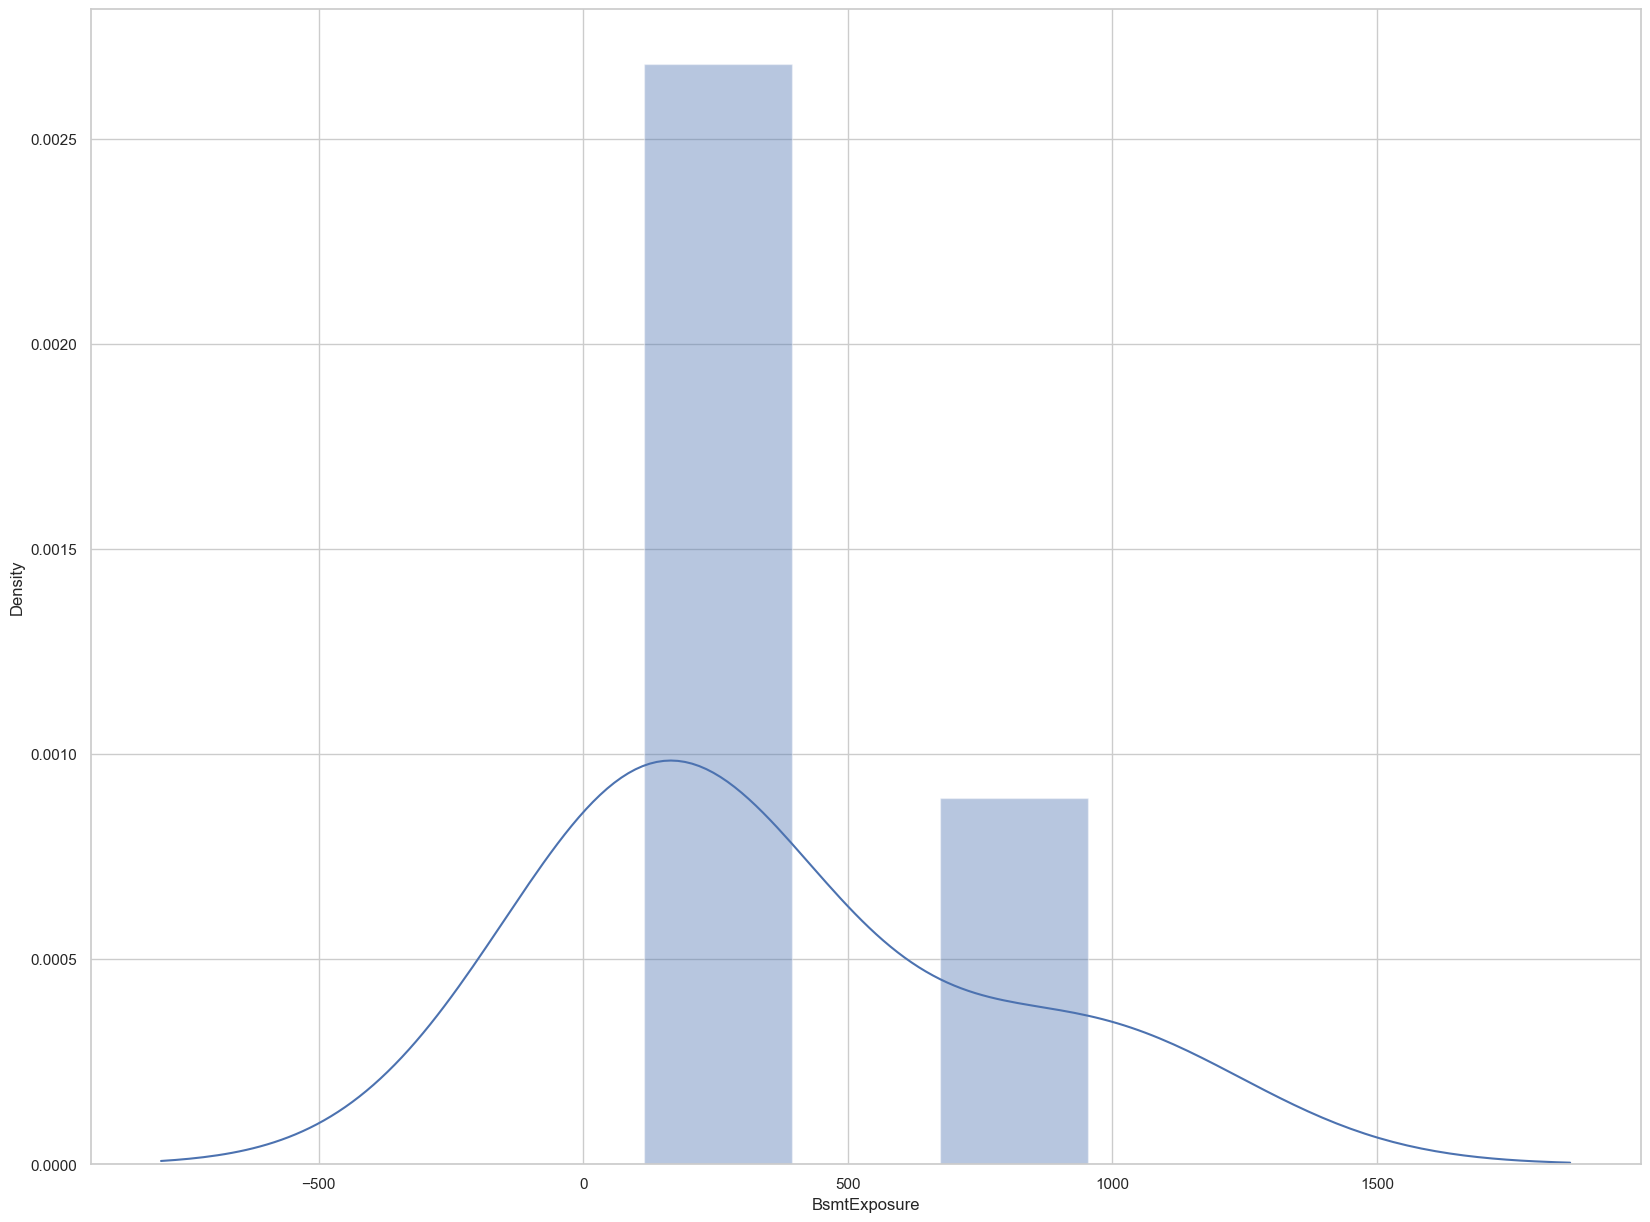

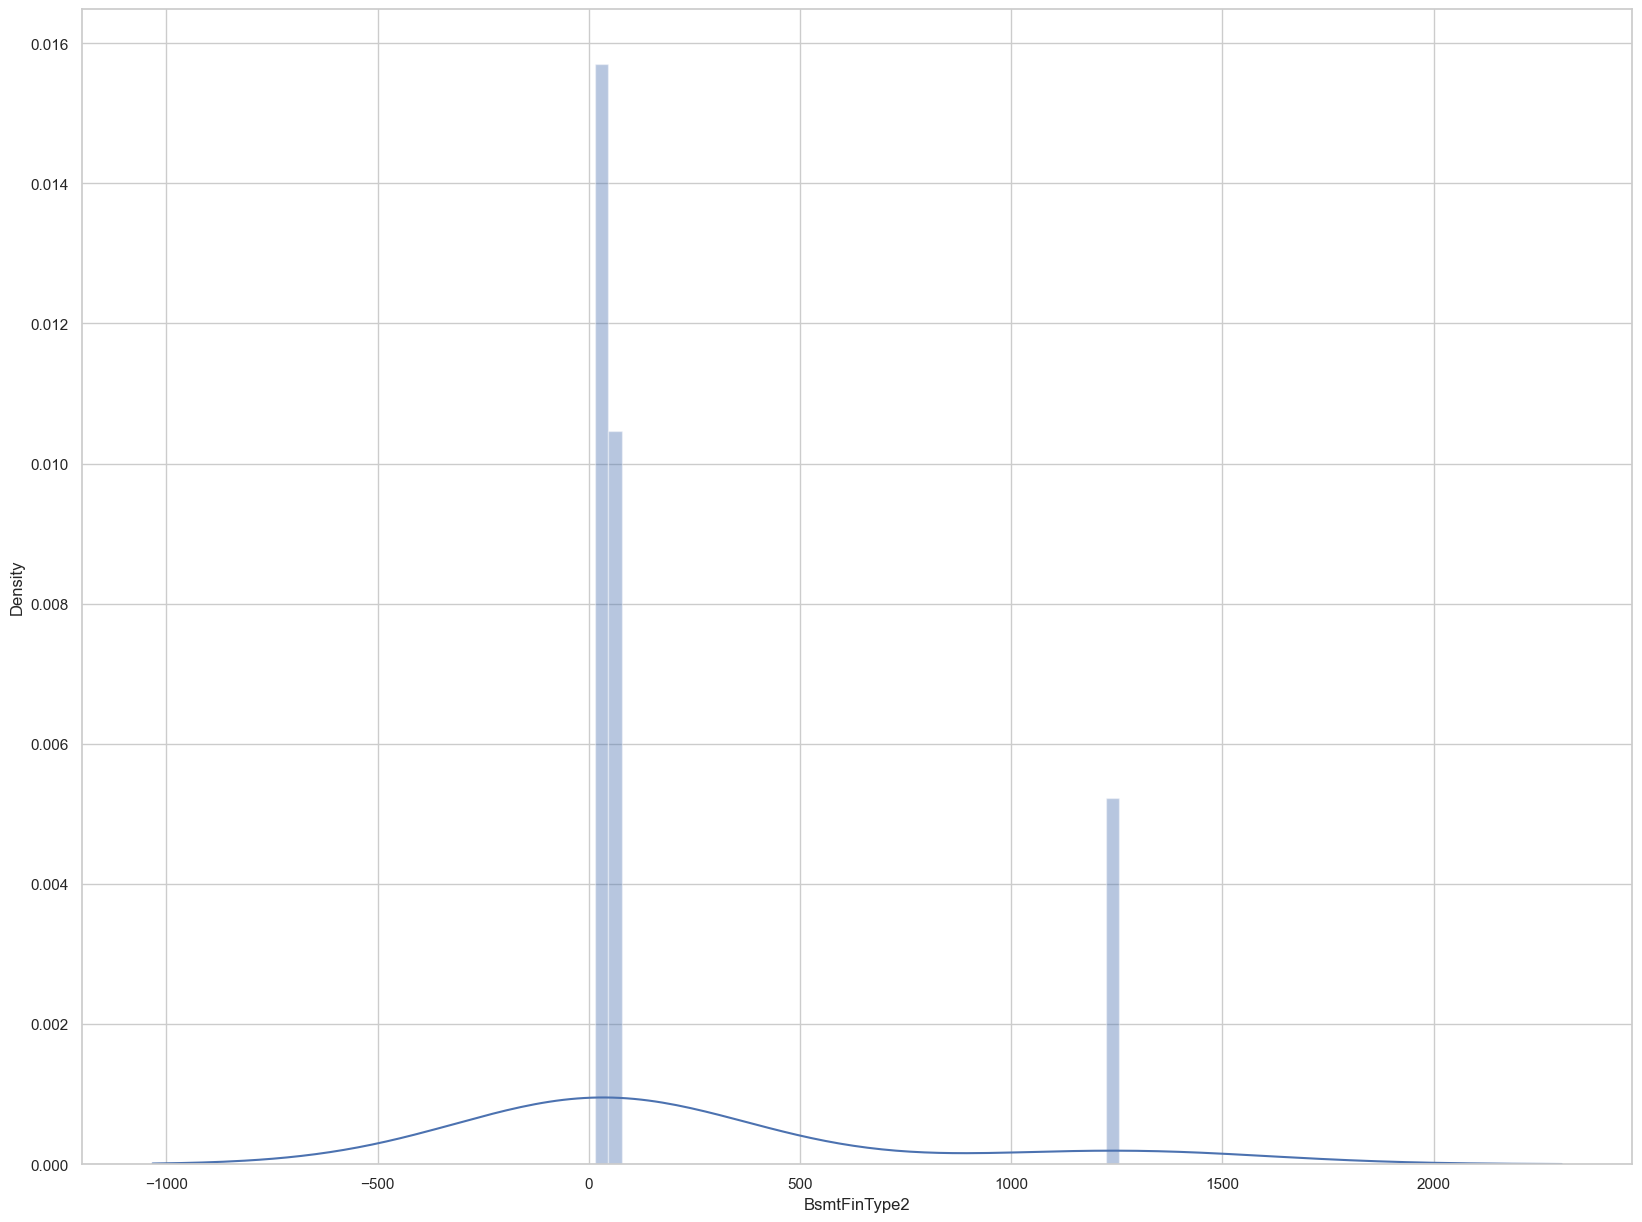

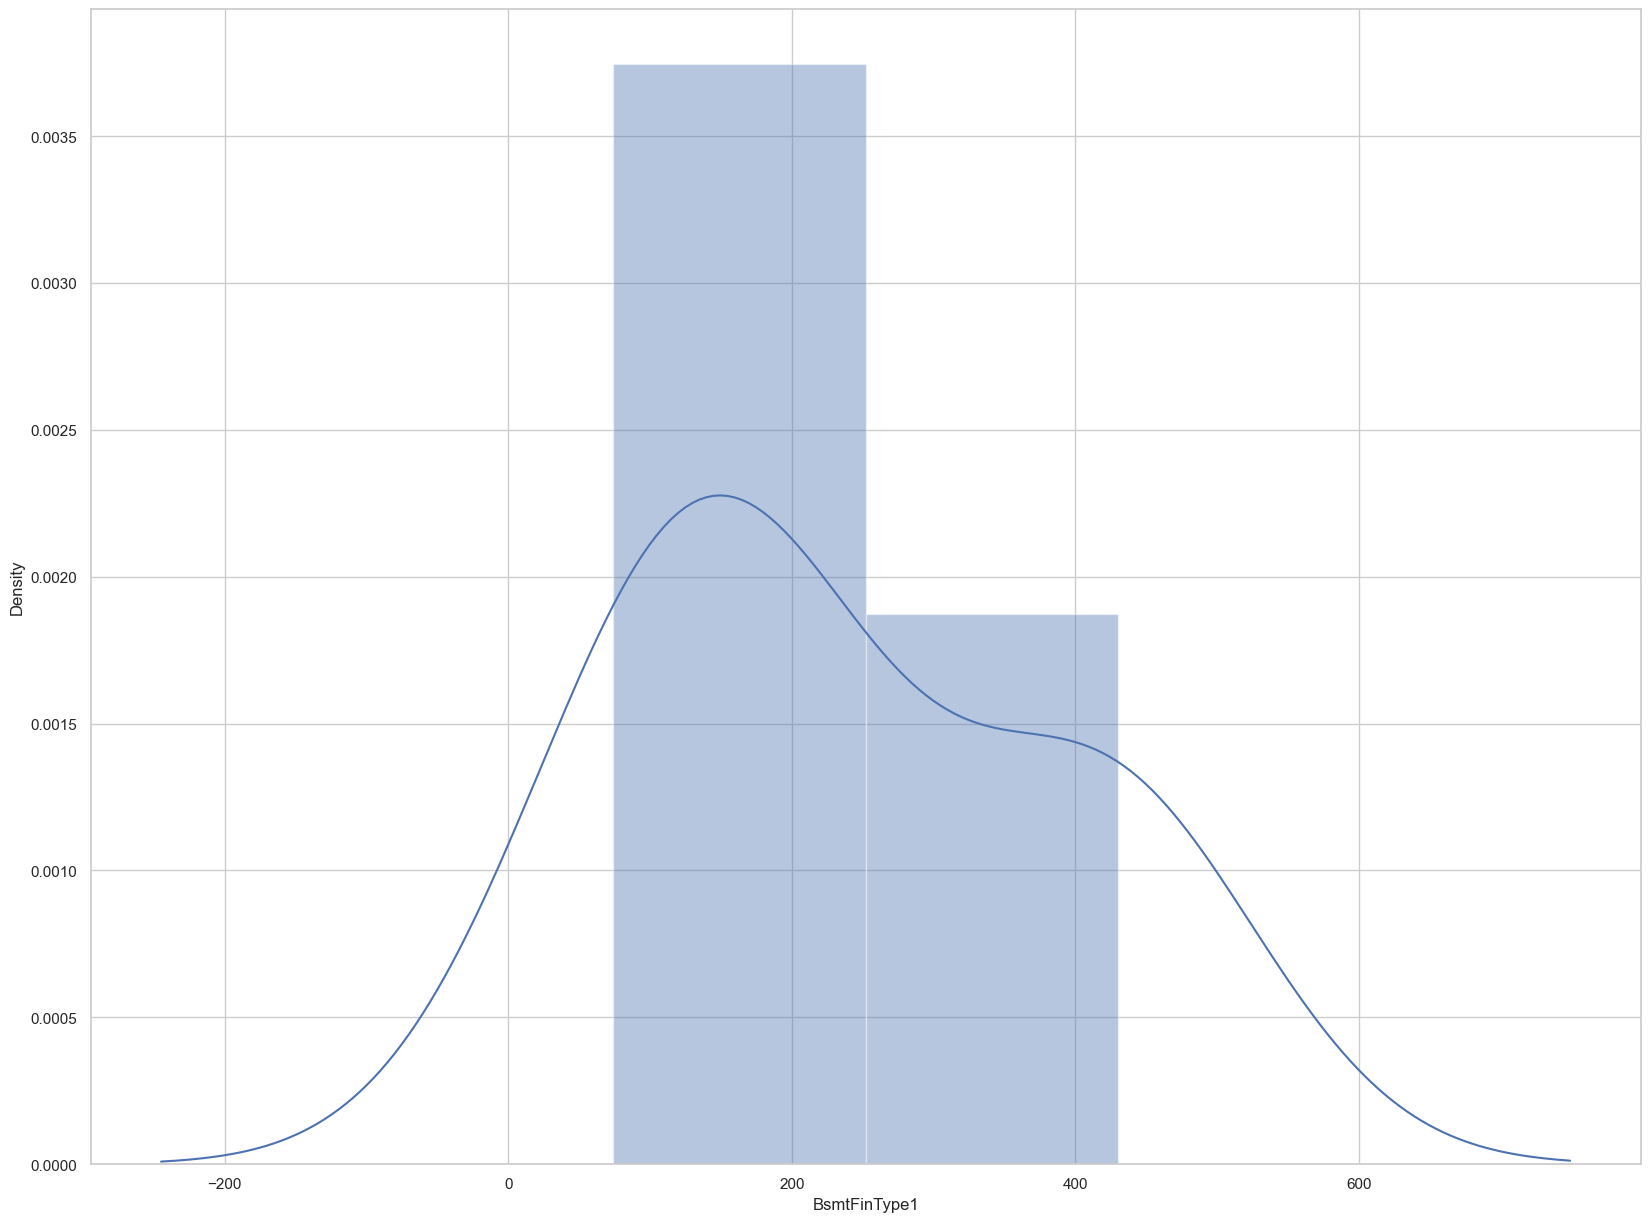

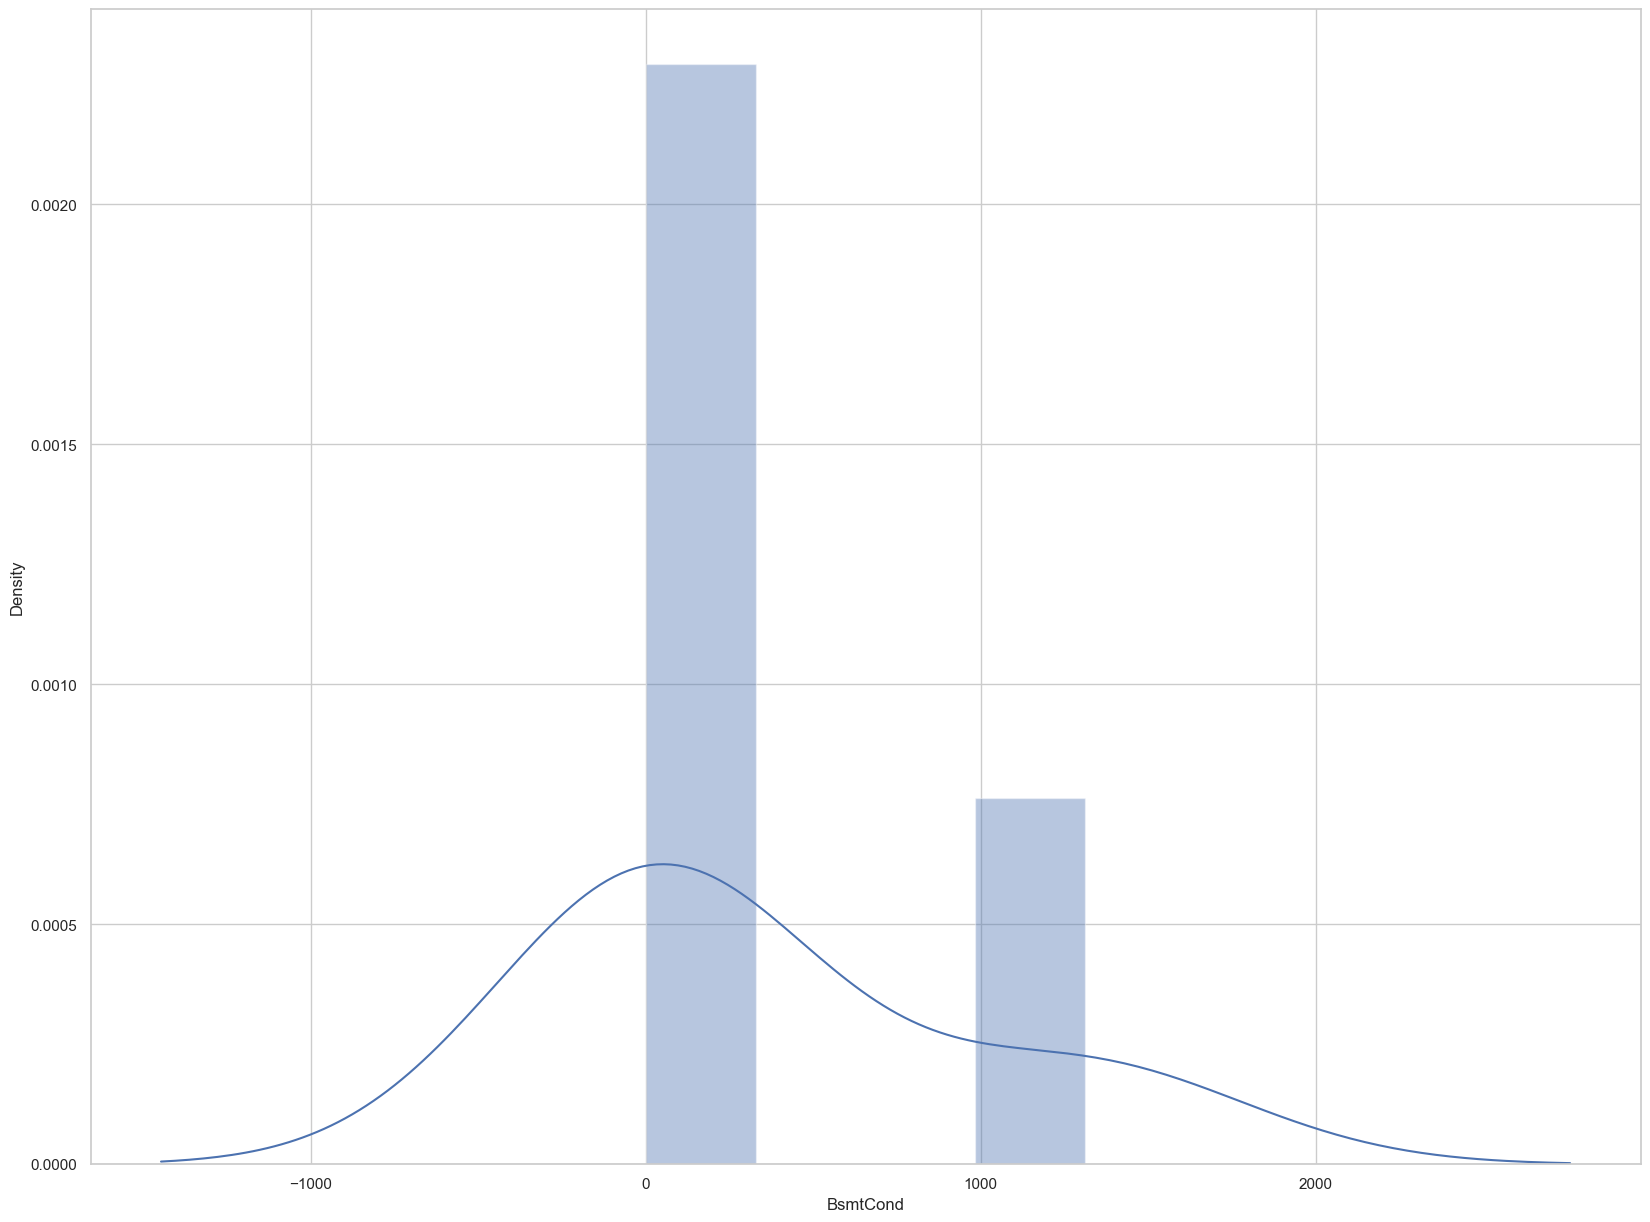

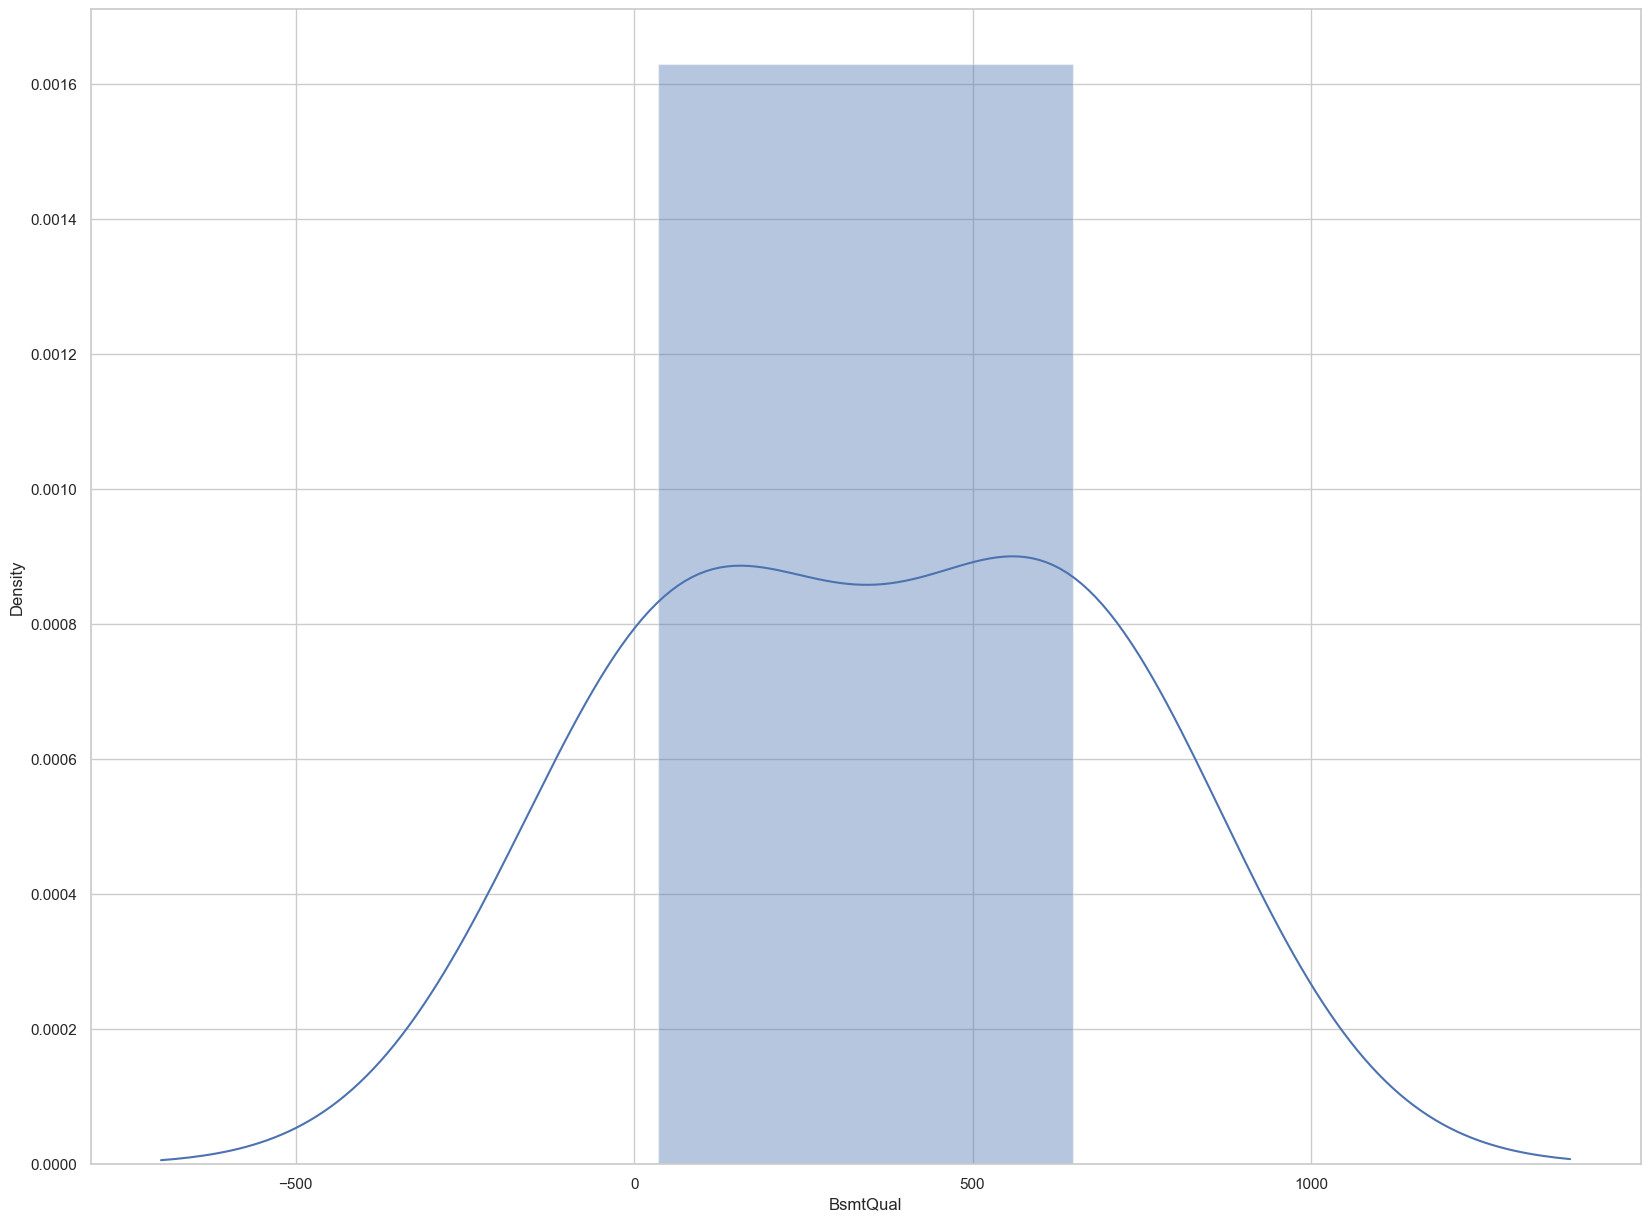

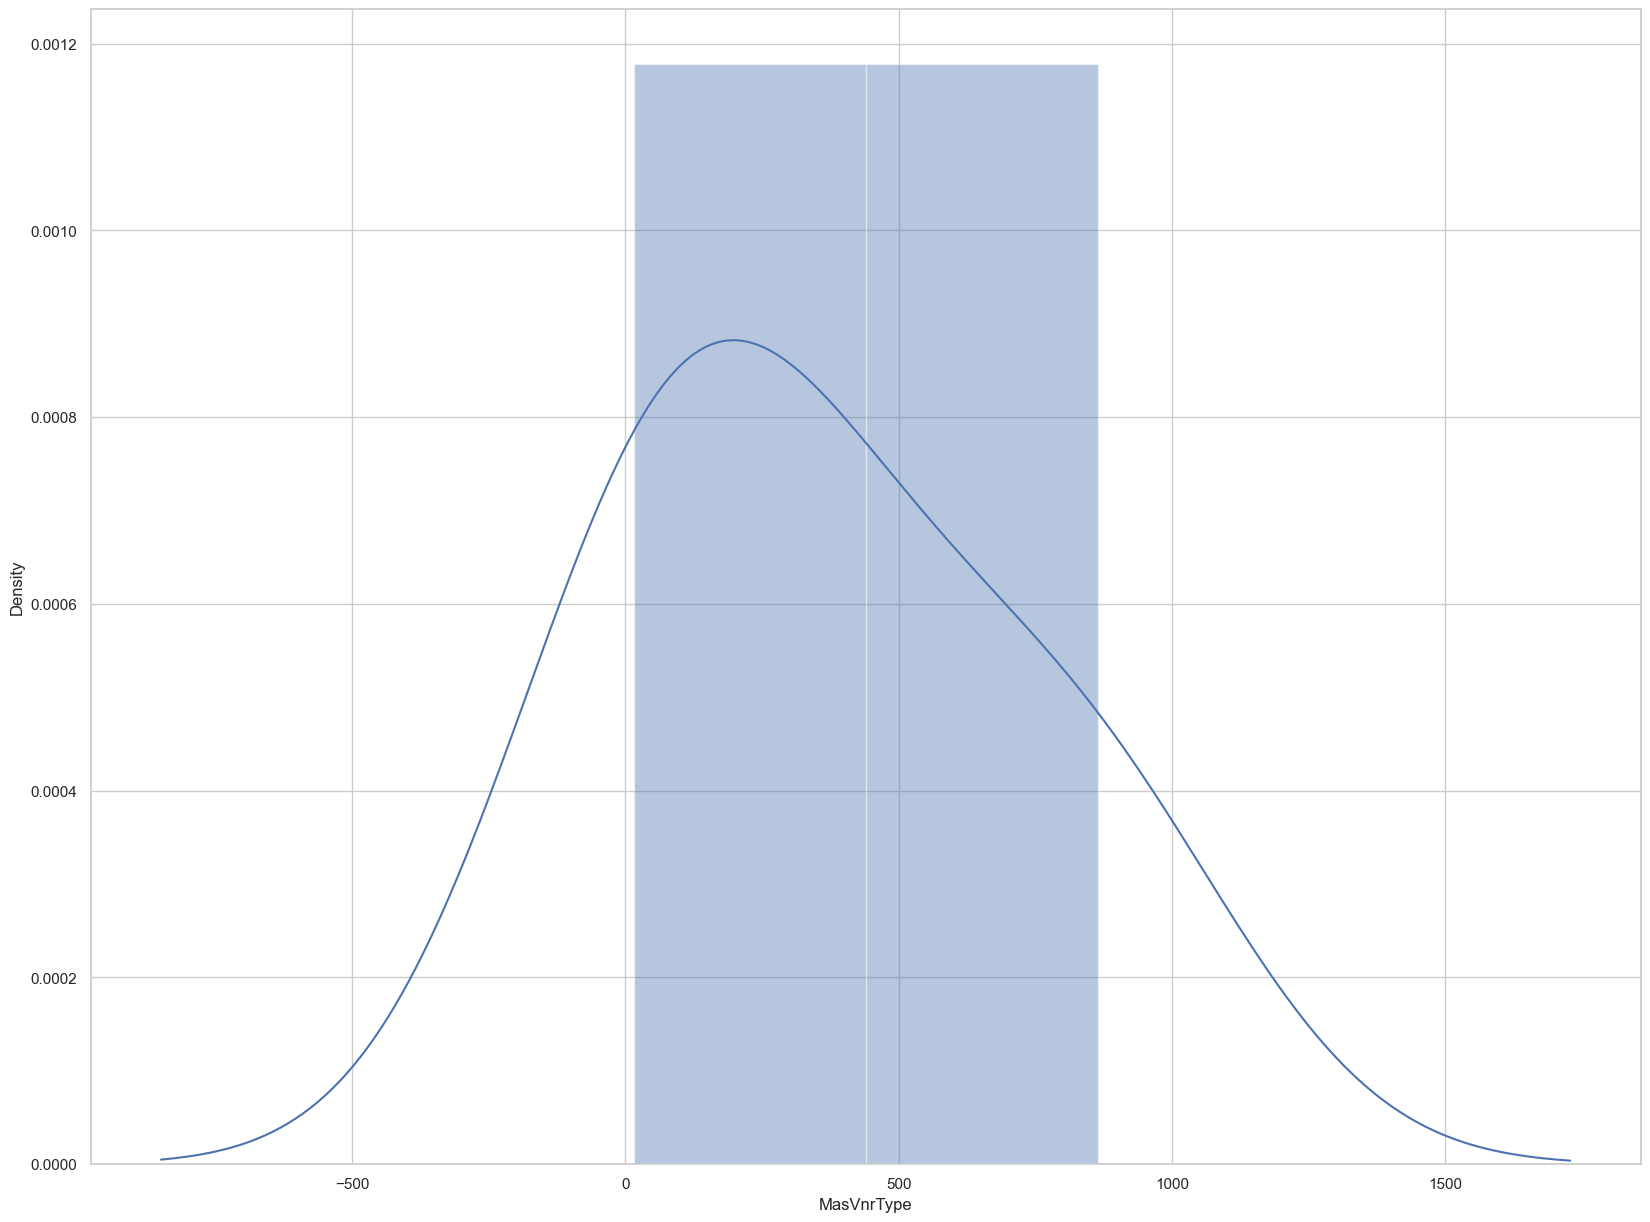

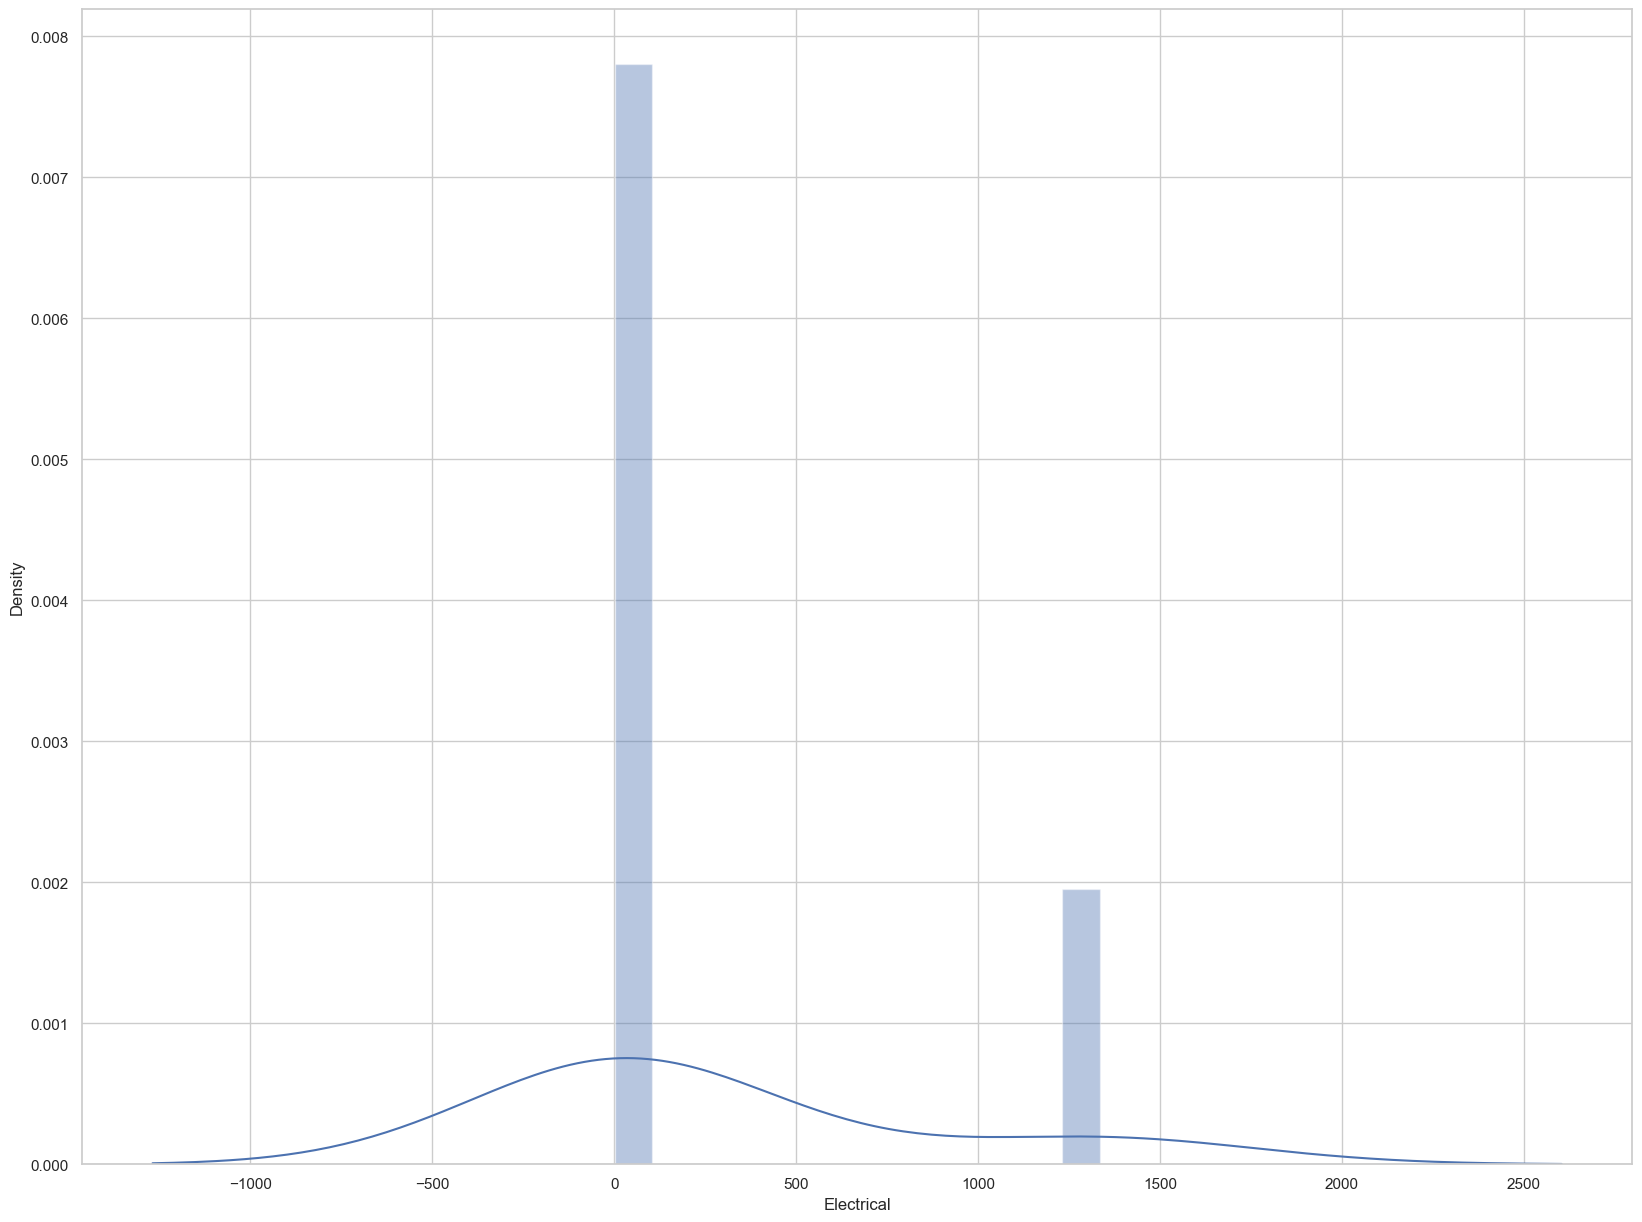

In [40]:
f1 = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
for i in df[f1]:
    plt.figure()
    sns.distplot(df[i].value_counts() )
    

After observing distributions inequalities and big differences between min and max, let's check the number of each feature class being counted

In [41]:
for i in df[f1]:
    print(df[i].value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP  

Now we can see that 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond' have higly unequal distribution, so we will apply another aproach for those features, instead of just replacing them with 'NA'.
Let's replace them with the value that is most common for the feature selected


In [42]:
f2 = ['Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageCond','GarageQual']
#MasVnrtype first
df['Electrical'].fillna('Sbrkr', inplace = True)
#BsmtFinType1
df['BsmtCond'].fillna('TA', inplace = True)
#BsmtExposure
df['BsmtFinType2'].fillna('Unf', inplace = True)
#GarageFinish
df['GarageQual'].fillna('TA', inplace = True)
#GarageQual
df['GarageCond'].fillna('TA', inplace = True)

#MasVnrtype first
test['Electrical'].fillna('Sbrkr', inplace = True)
#BsmtFinType1
test['BsmtCond'].fillna('TA', inplace = True)
#BsmtExposure
test['BsmtFinType2'].fillna('Unf', inplace = True)
#GarageFinish
test['GarageQual'].fillna('TA', inplace = True)
#GarageQual
test['GarageCond'].fillna('TA', inplace = True)

Now let's see what other non-numerical features we got left, let's subtract 2 lists and make a new one in order to make no mistake


In [43]:
f1 = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
f2 = ['Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageCond','GarageQual']
f3 = []
for i in f1:
    if i not in f2:
        f3.append(i)
print('Features to replace NaN with "NA": ', f3)

Features to replace NaN with "NA":  ['FireplaceQu', 'GarageType', 'GarageFinish', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'MasVnrType']


In [44]:
#replace chosen features NaN from f3 list above with 'NA'
df[f3] = df[f3].fillna('NA')
test[f3] = test[f3].fillna('NA')
#Check the NaN values
df[f3].isnull().sum()

FireplaceQu     0
GarageType      0
GarageFinish    0
BsmtExposure    0
BsmtFinType1    0
BsmtQual        0
MasVnrType      0
dtype: int64

In [45]:
correlation_m = df[numeric].corr
df.MasVnrType

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [46]:
df[numeric]

LotFrontage  GarageYrBlt  MasVnrArea
0            65.0       2003.0       196.0
1            80.0       1976.0         0.0
2            68.0       2001.0       162.0
3            60.0       1998.0         0.0
4            84.0       2000.0       350.0
...           ...          ...         ...
1455         62.0       1999.0         0.0
1456         85.0       1978.0       119.0
1457         66.0       1941.0         0.0
1458         68.0       1950.0         0.0
1459         75.0       1965.0         0.0

[1460 rows x 3 columns]

In [47]:
num_feat = []
cat_feat = []

for i in df:
    if i in numdf:
        num_feat.append(i)
    else:
        cat_feat.append(i)
print('List of numeric column values: ', num_feat)
print('\n')
print('List of objects column values: ', cat_feat)

List of numeric column values:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


List of objects column values:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functi

Text(0.5, 1.0, 'SalePrice Correlation')

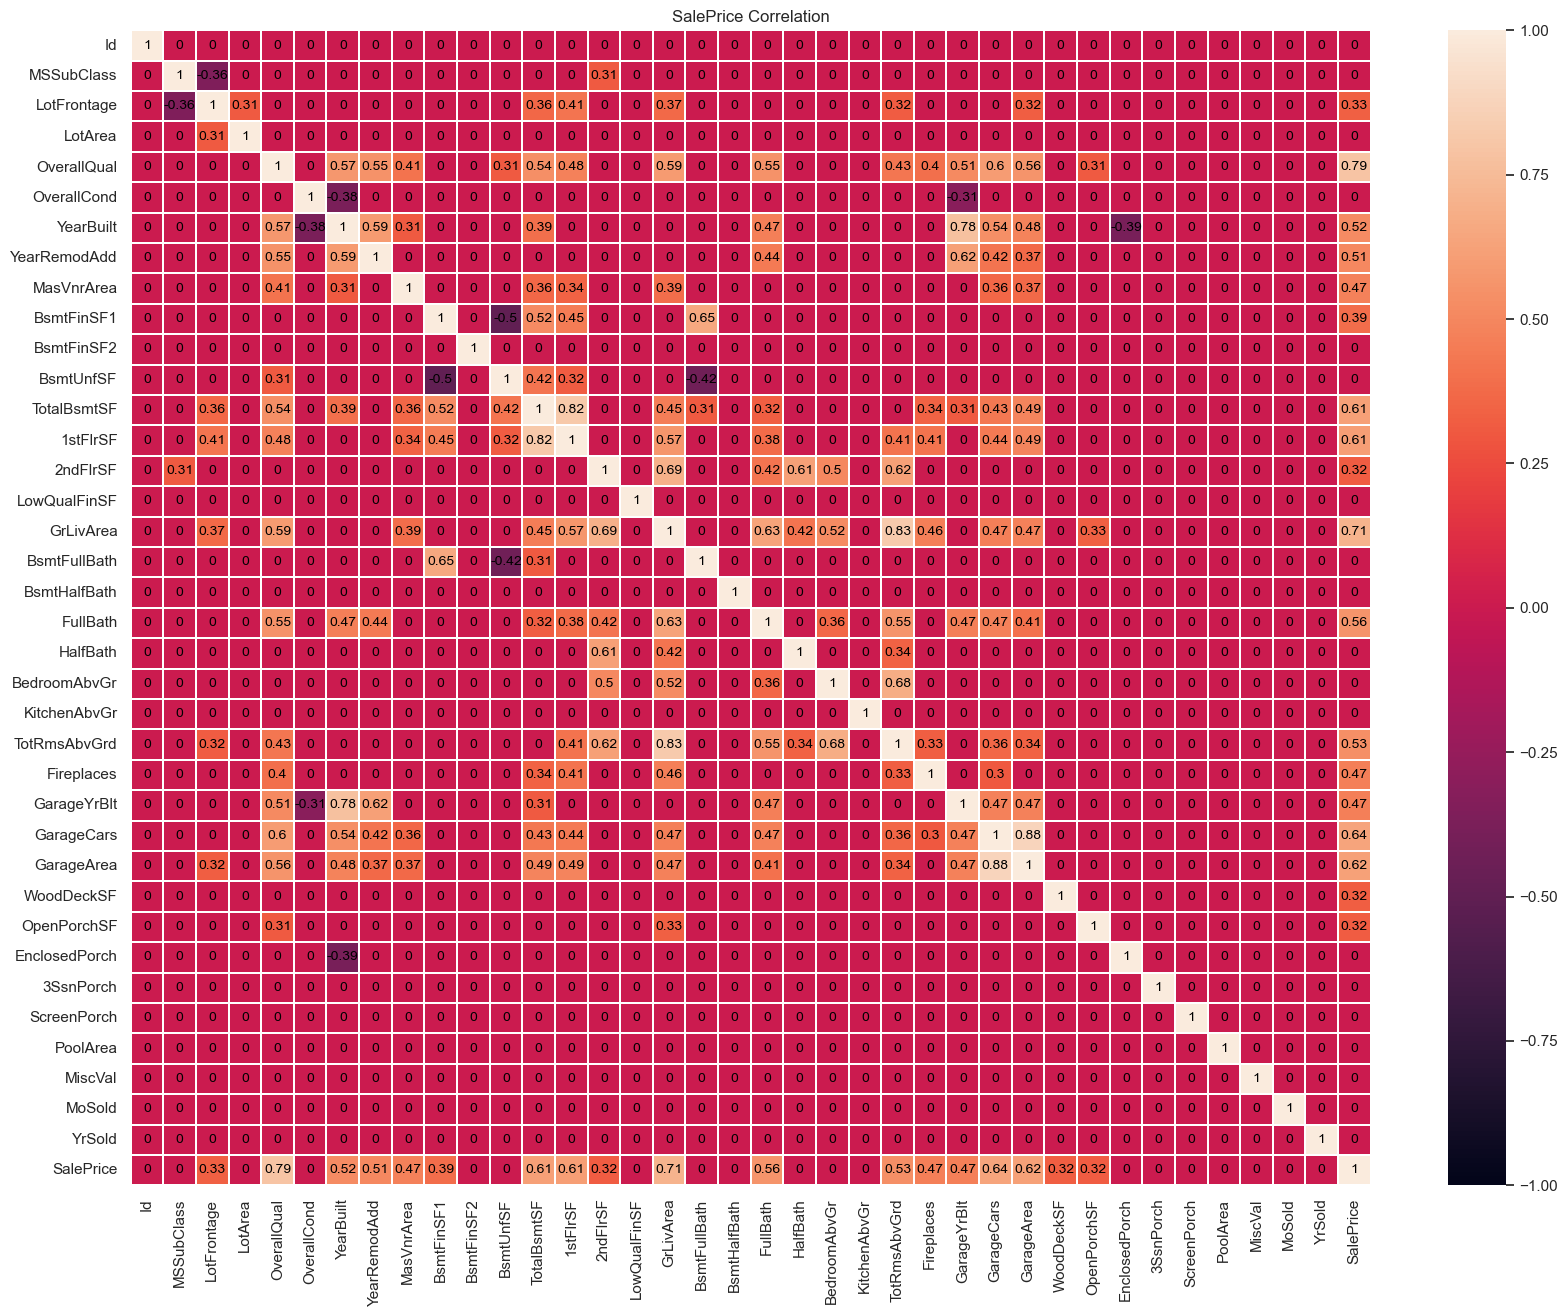

In [48]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df[num_feat].corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# plot the heatmap
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 10, "color": "black"},annot=True)
plt.title("SalePrice Correlation")

The highest correlation with SalePrice is observed in GarageCars and GarageArea, GrLivArea,TotalbsmtSF, OverallQual

In [49]:
corr = df.corr()['SalePrice'].sort_values(ascending = False)[2:10]
corr

GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
Name: SalePrice, dtype: float64

Now we have our Features selected. Let's proceed to EDA


## Deeper into the data

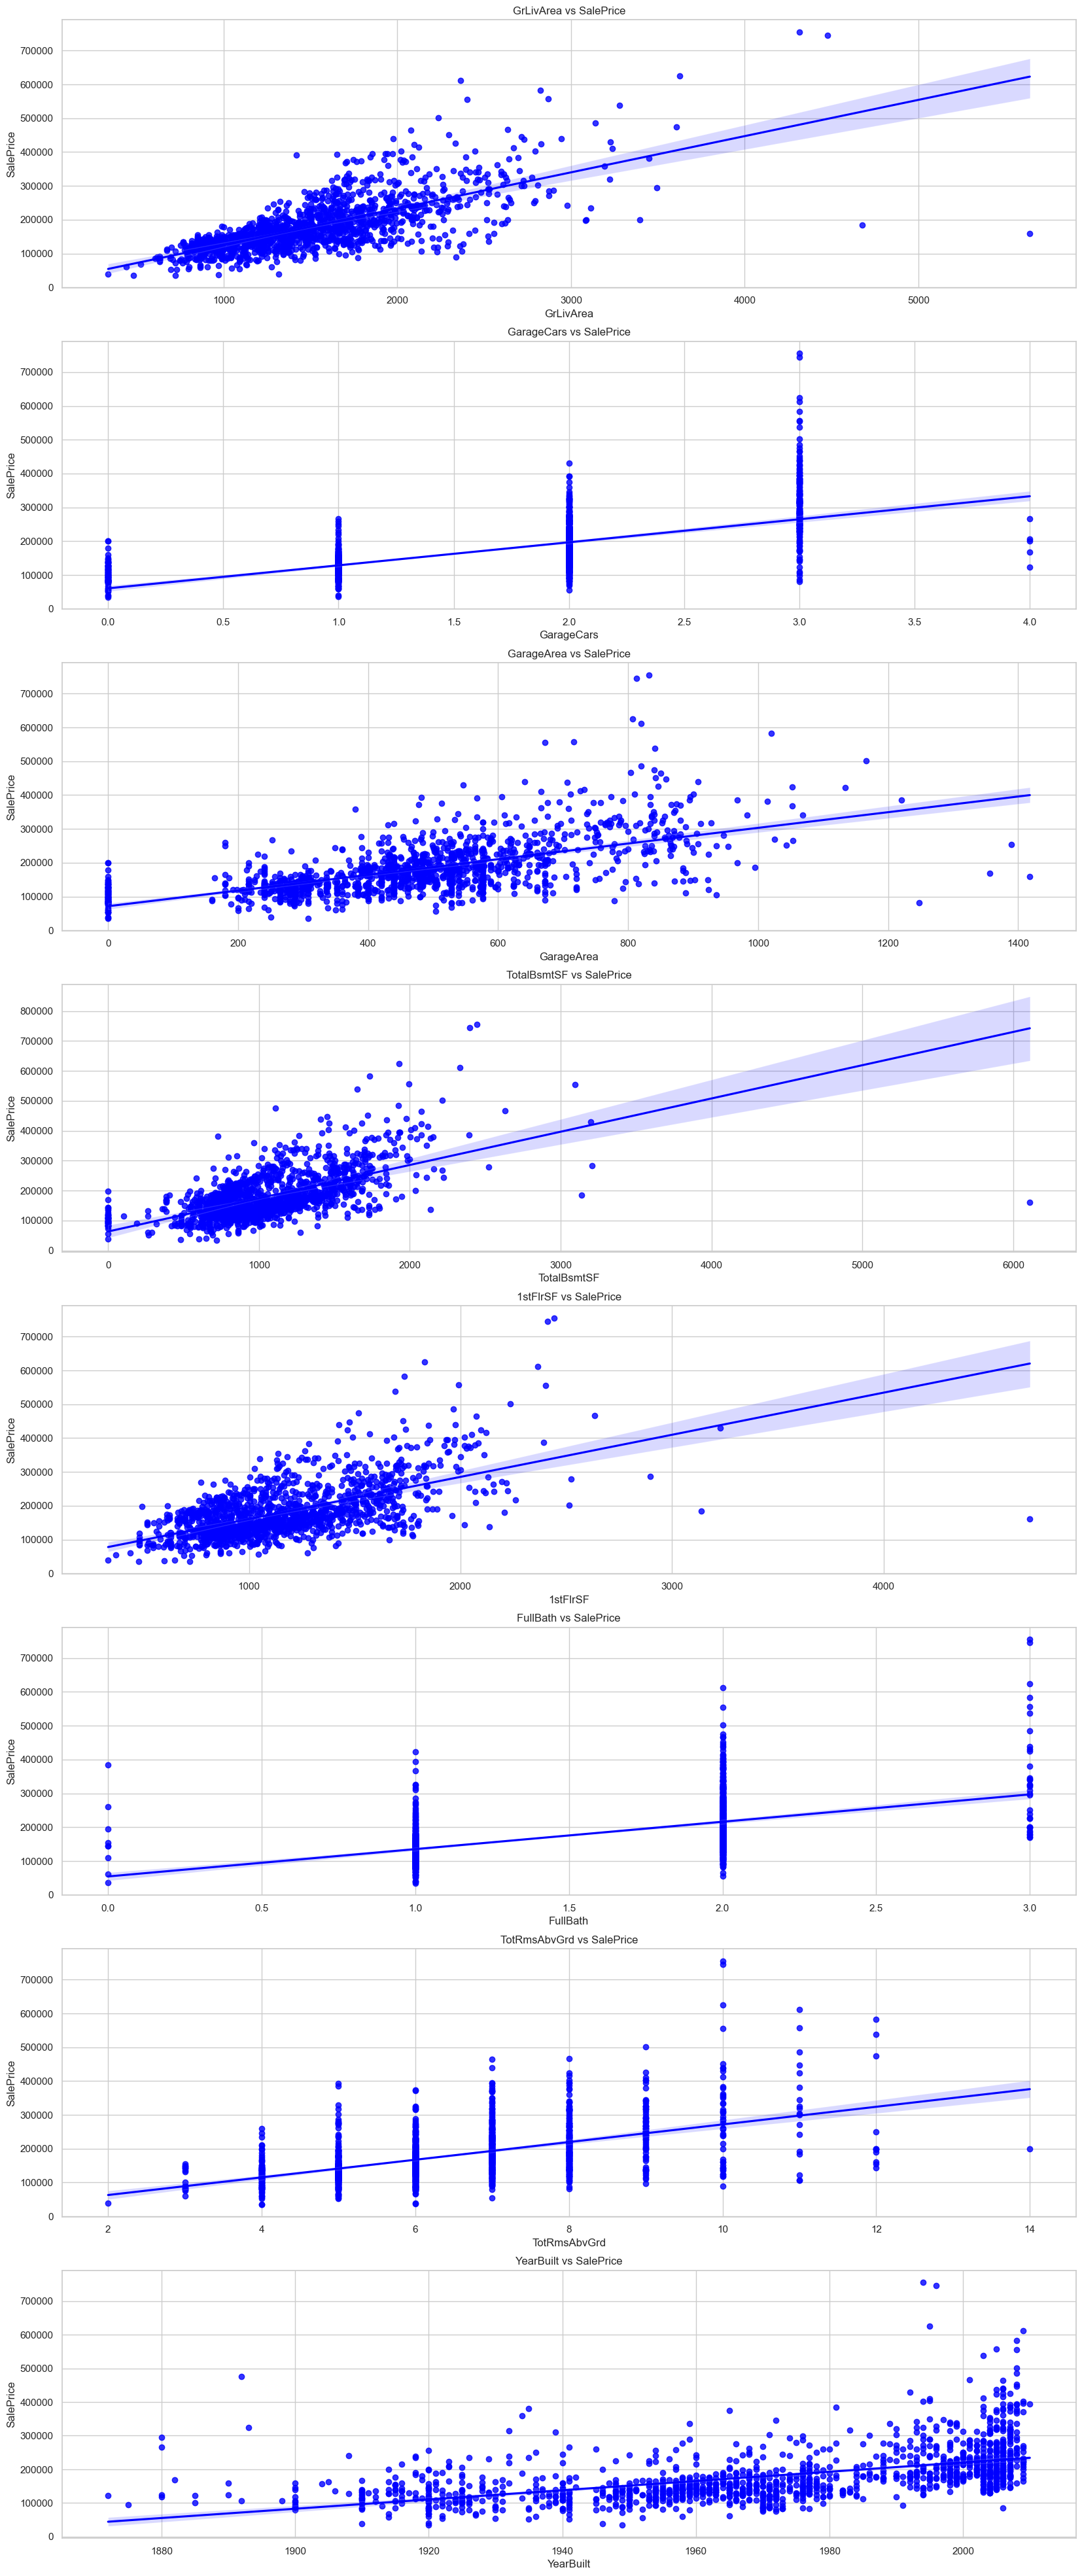

In [50]:
f, ax = plt.subplots(nrows = 8, ncols = 1, figsize = (20,50))
for i, col in enumerate(corr.index):
    sns.regplot(x = col, y = 'SalePrice', data = df, ax = ax[i], color = 'blue')
    ax[i].set_title(f'{col} vs SalePrice')

## Let's take a closer look at our dataset to get more insights
Let's look at the amount of houses built for each year

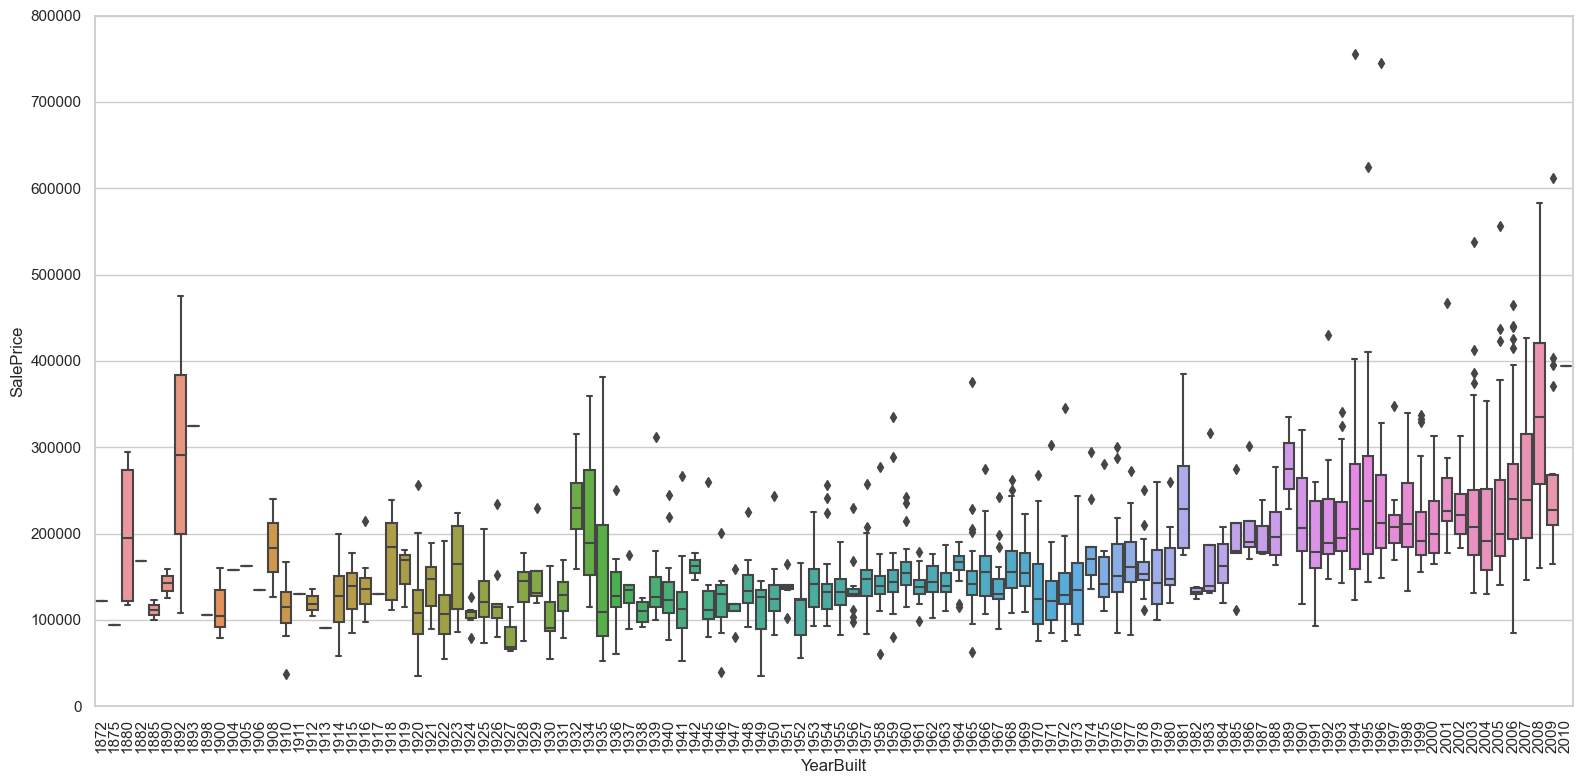

In [51]:
f, ax = plt.subplots(figsize=(16, 8))
g = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data =df )
g.axis(ymin = 0, ymax = 800000);
plt.xticks(rotation = 90);
plt.tight_layout()
#f, ax = plt.subplots(figsize=(16, 8))
#fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df,)
#fig.axis(ymin=0, ymax=900000);
#plt.xticks(rotation=90);
#plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

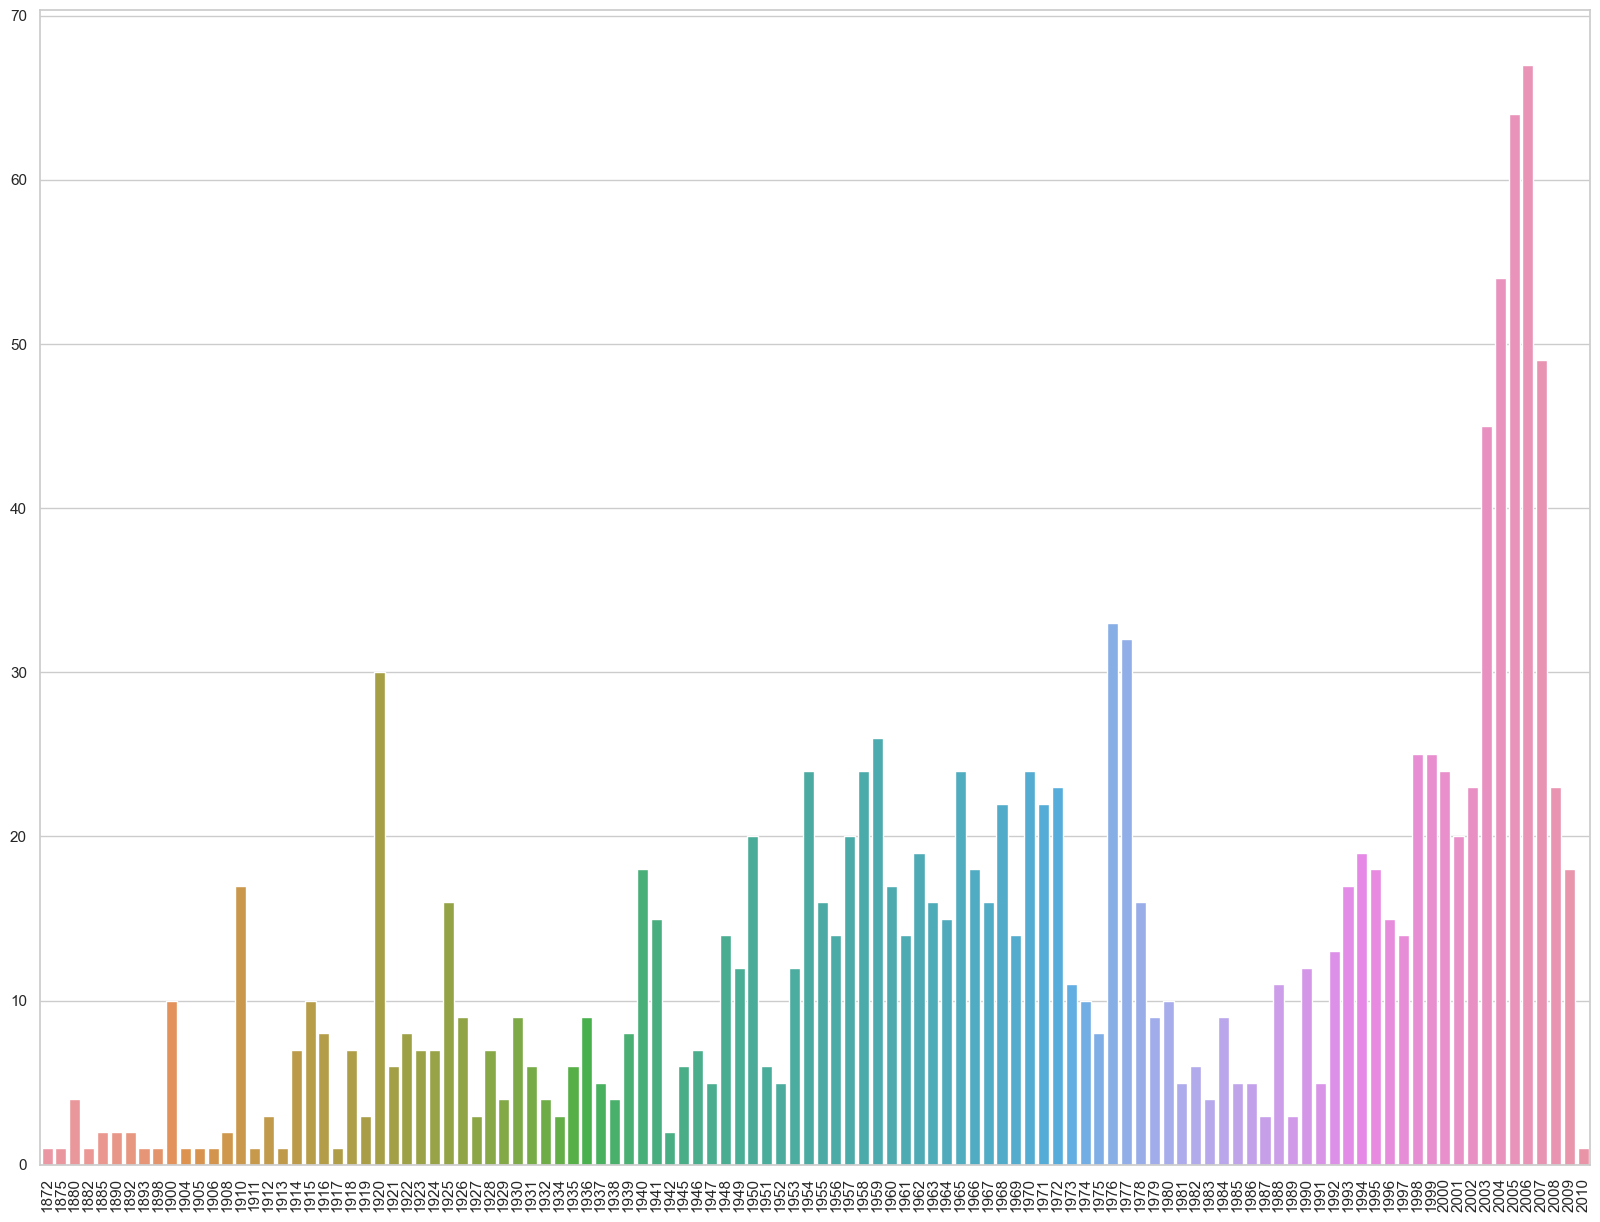

In [52]:
houseperyear = df['YearBuilt'].value_counts()
sns.barplot(x = houseperyear.index, y = houseperyear.values)
plt.xticks(rotation = 90);
plt.tight_layout

Let's check if the month affects the SalePrice

In [53]:
month = df.groupby('MoSold')['SalePrice'].mean().sort_values(ascending = False).reset_index()
month = pd.DataFrame(month)
month

MoSold  SalePrice
0        9 195,683.21
1       11 192,210.91
2       12 186,518.97
3        7 186,331.19
4        8 184,651.83
5        1 183,256.26
6        3 183,253.92
7       10 179,563.98
8        2 177,882.00
9        6 177,395.74
10       5 172,307.27
11       4 171,503.26

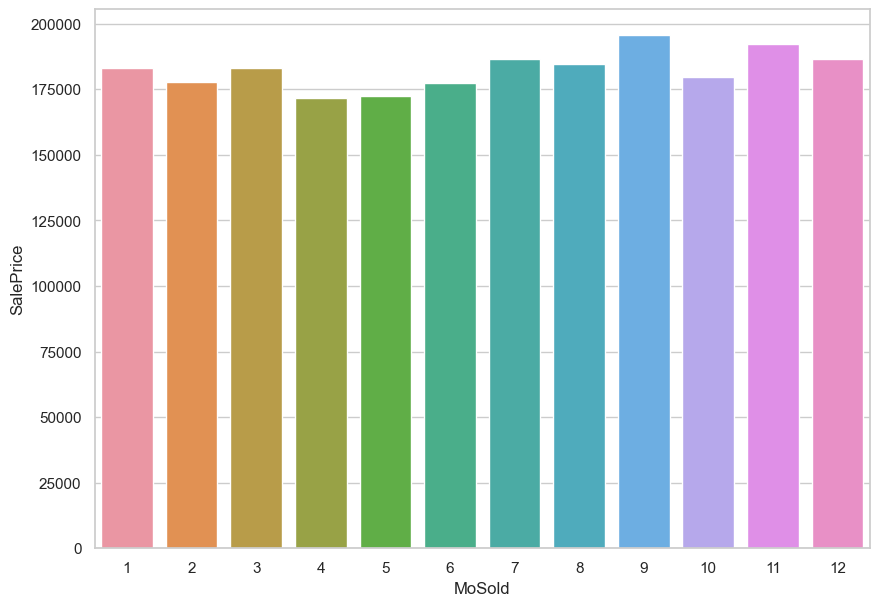

In [54]:
f, ax = plt.subplots(figsize = (10,7))
g = sns.barplot(x = 'MoSold', y = 'SalePrice', data = month)

# EDA

We already sorted our dataset relevant to their datatype (numeric or containing objects)
Let's look at the data a bit closer

In [55]:
#getting numerical features again
dtype_obj = list(column for column in df.select_dtypes([object]))
dtype_obj
print(len(dtype_obj), '\n', dtype_obj)

39 
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


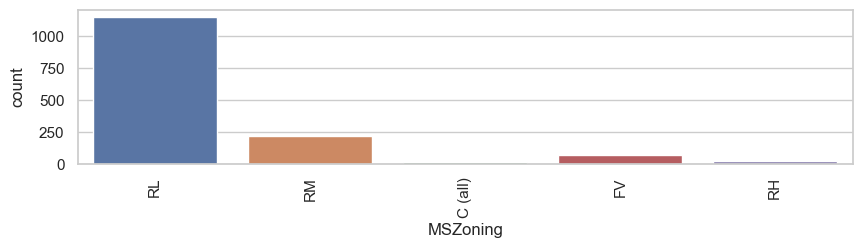

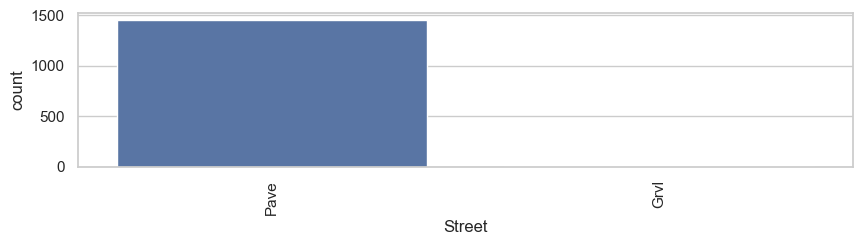

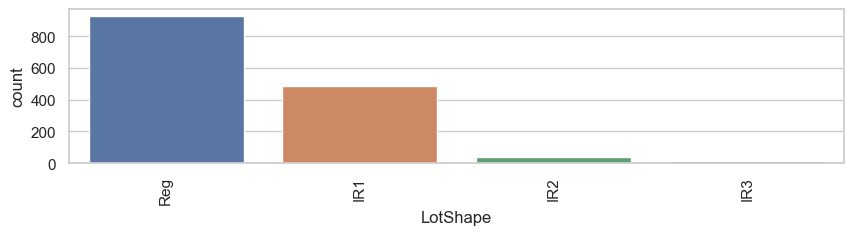

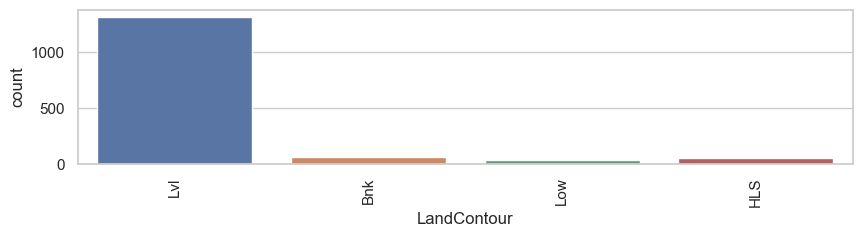

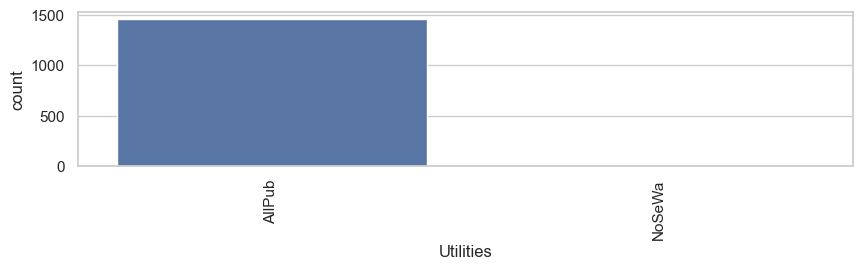

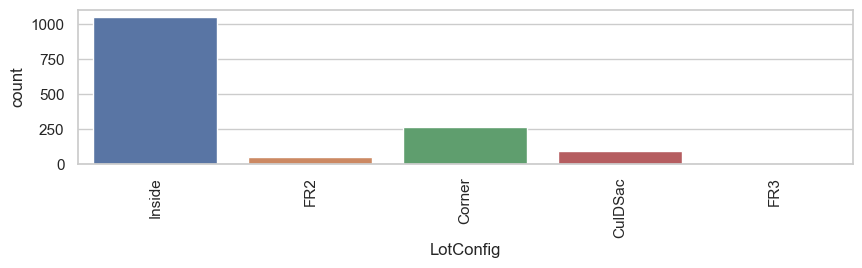

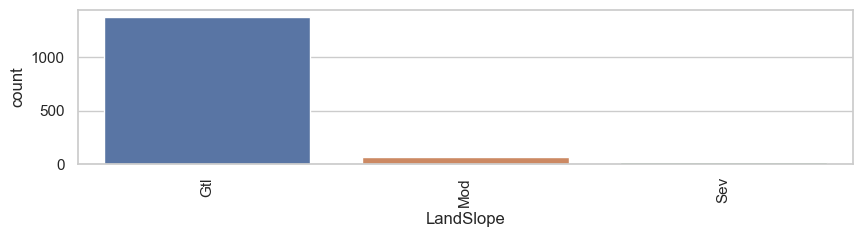

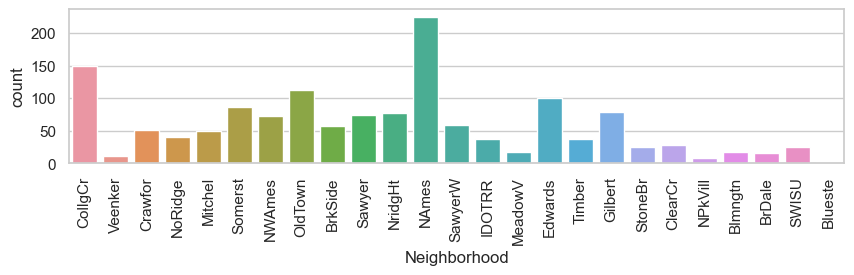

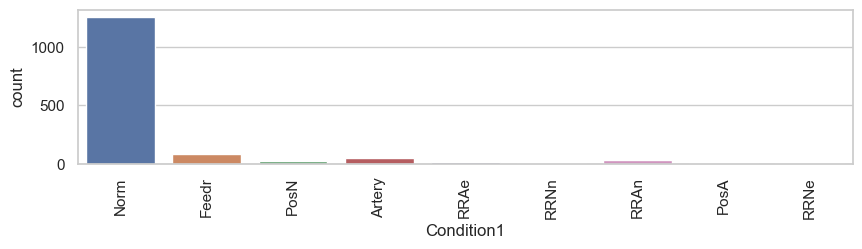

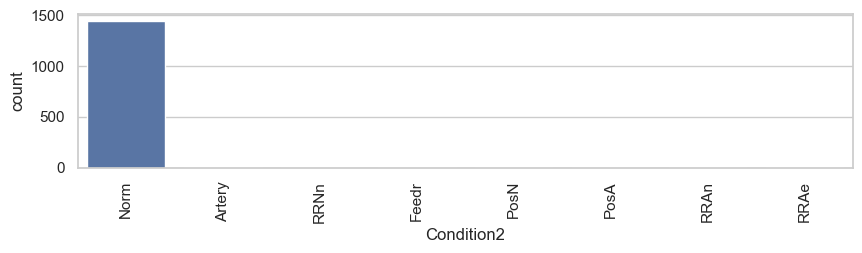

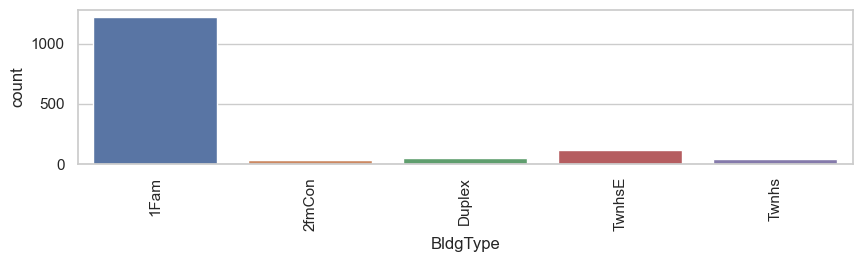

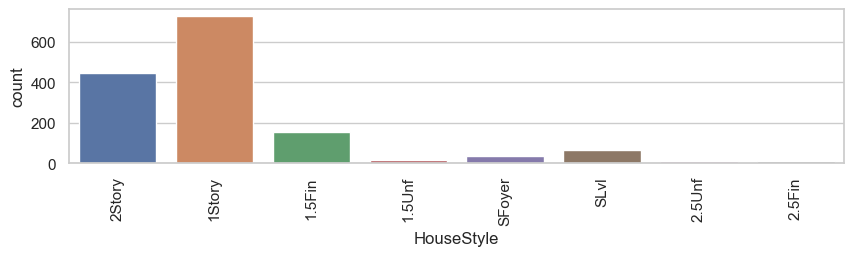

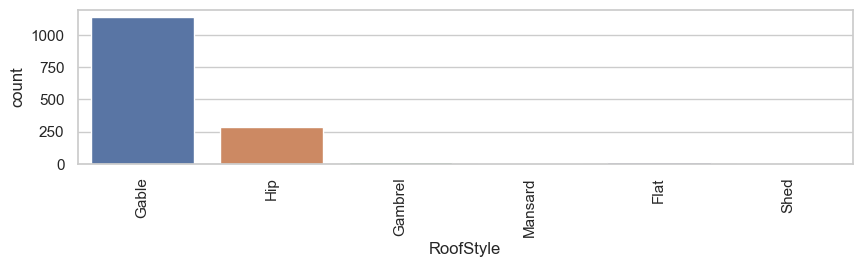

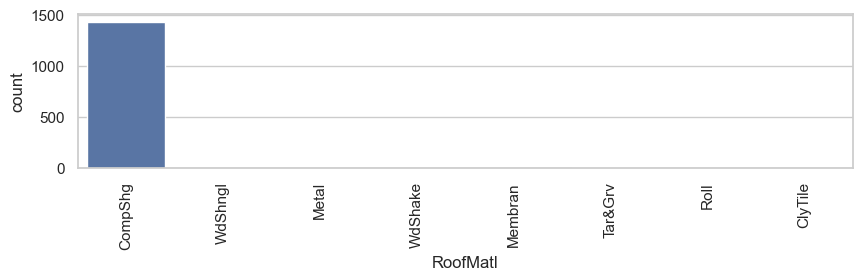

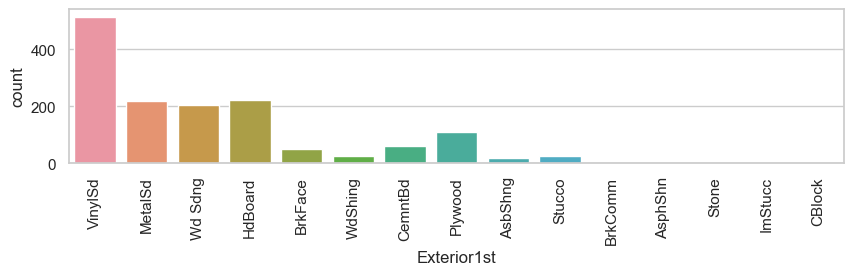

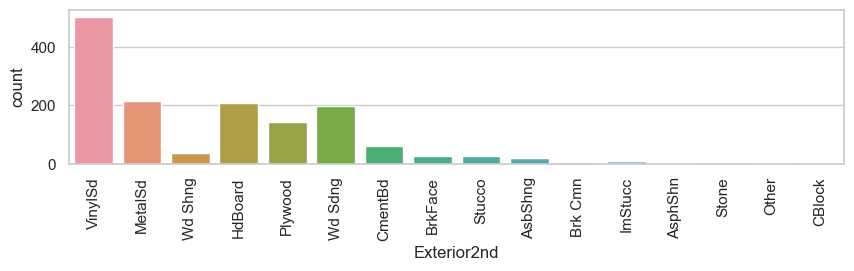

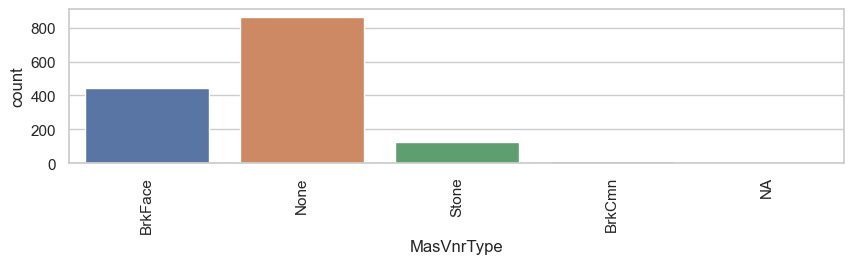

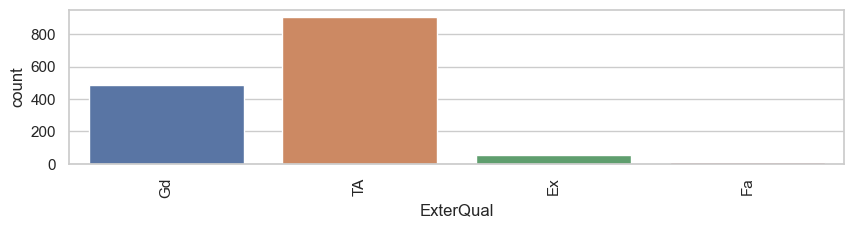

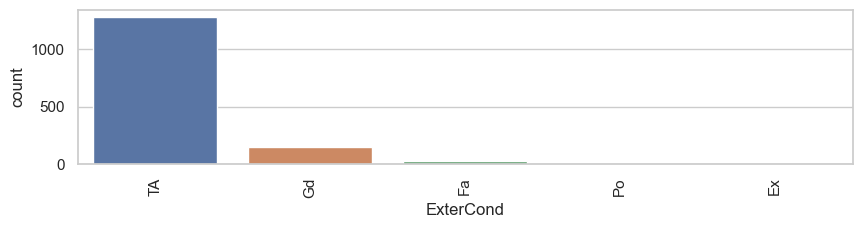

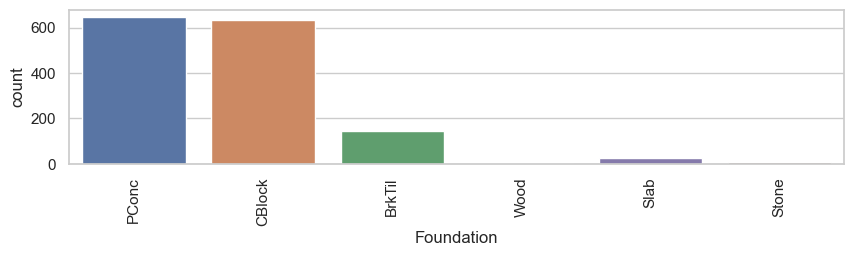

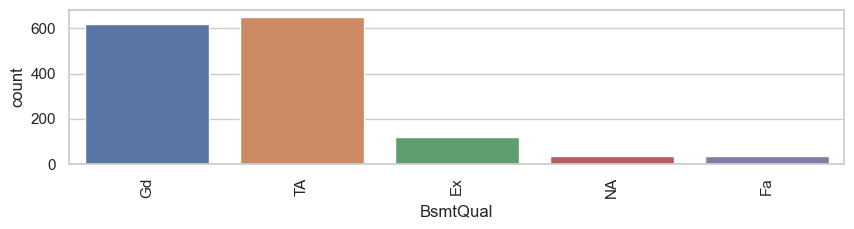

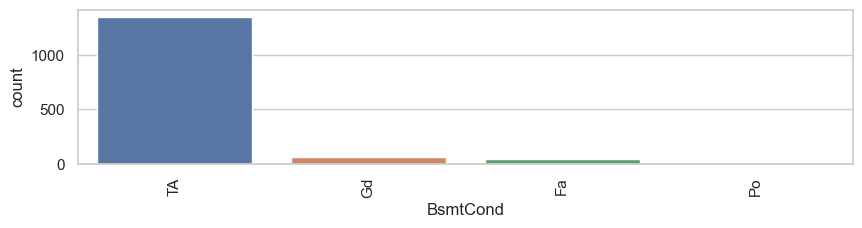

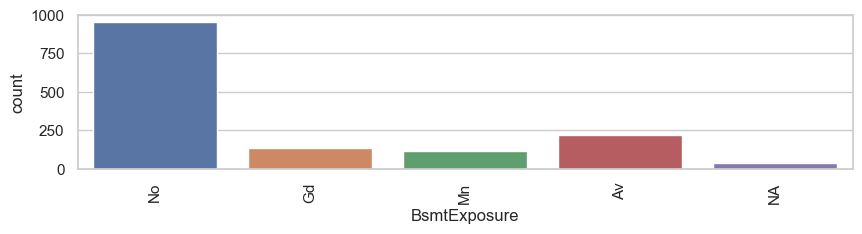

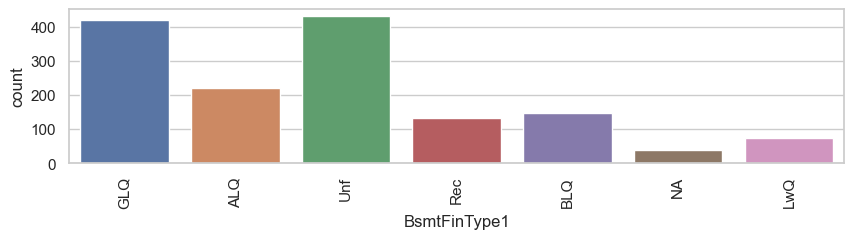

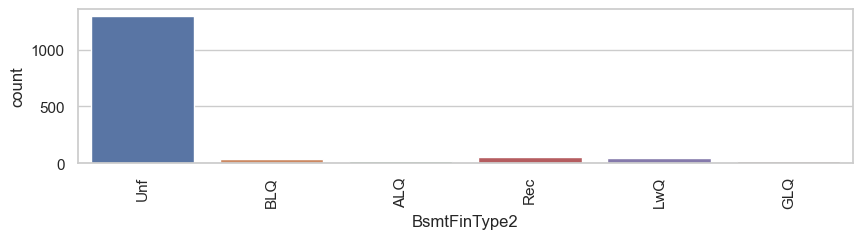

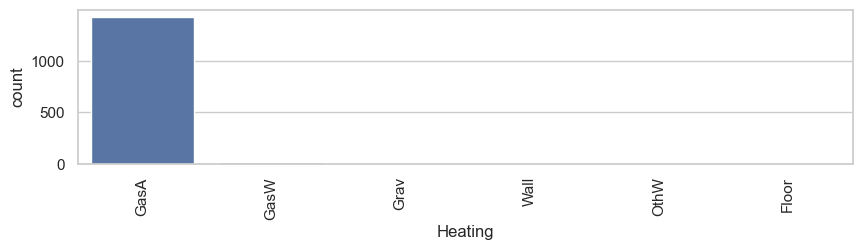

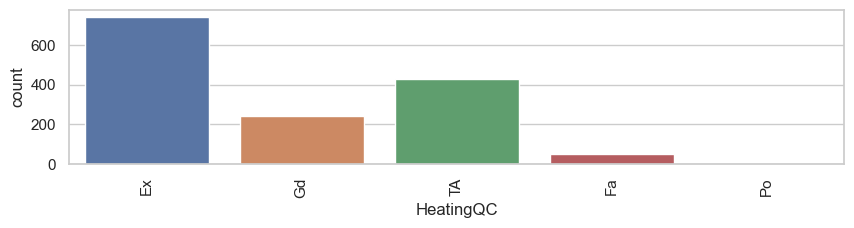

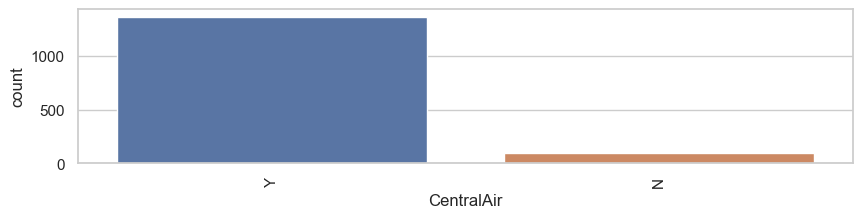

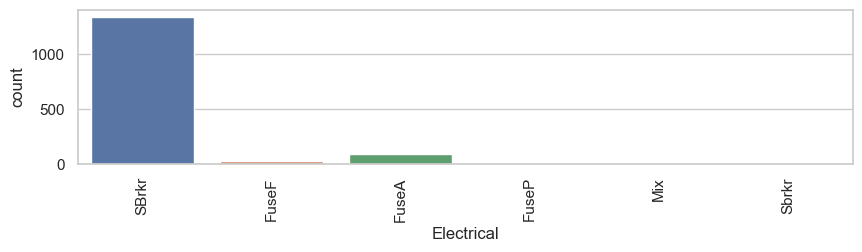

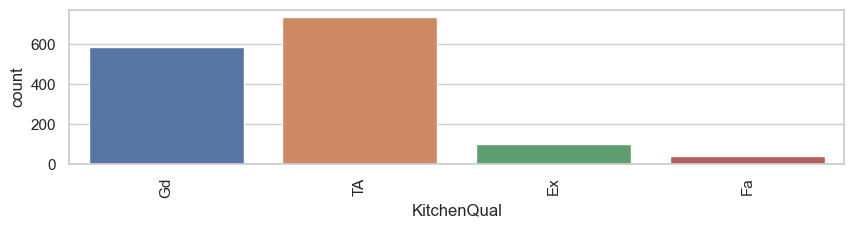

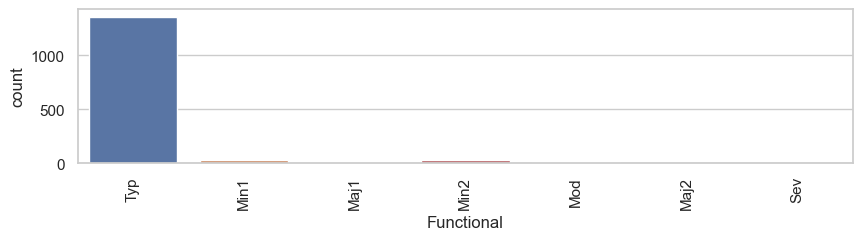

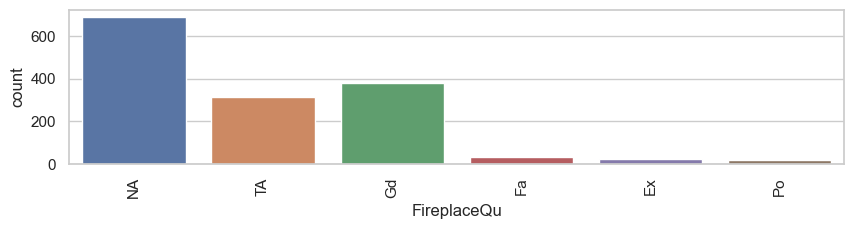

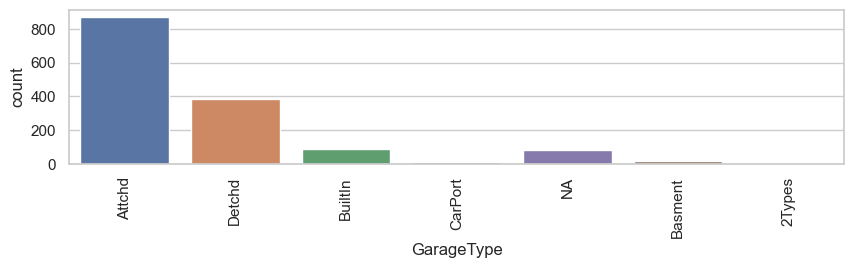

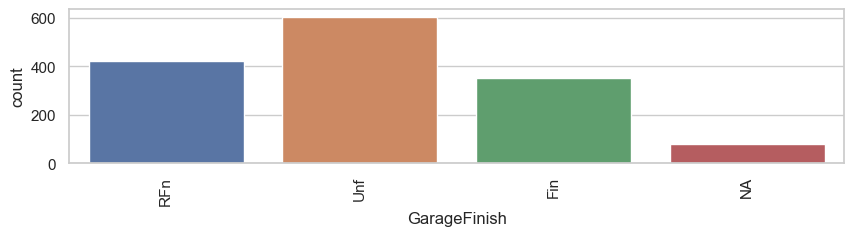

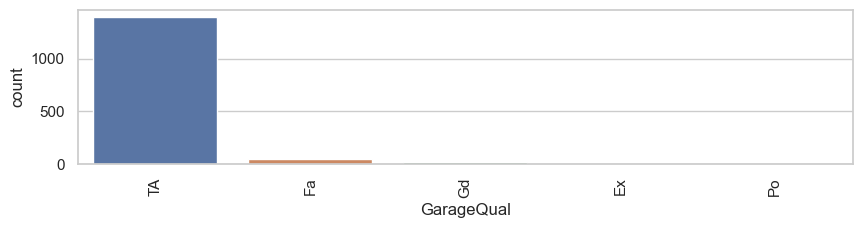

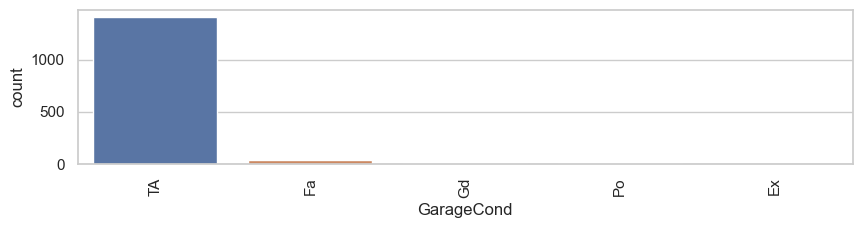

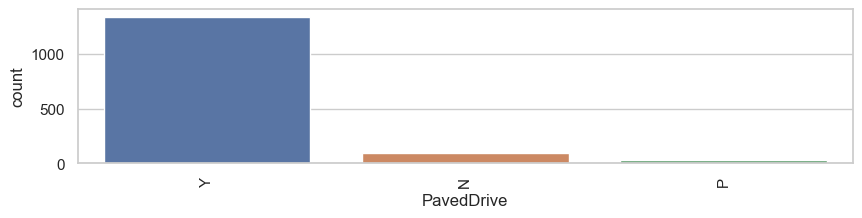

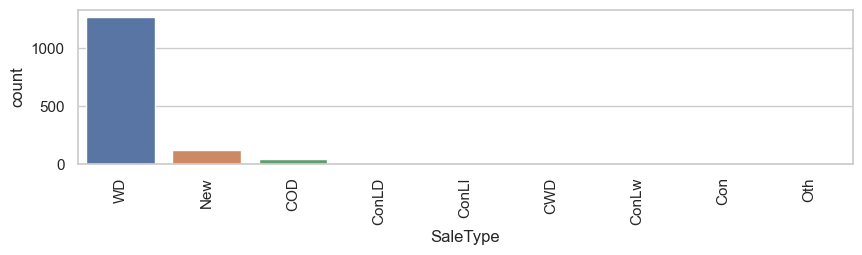

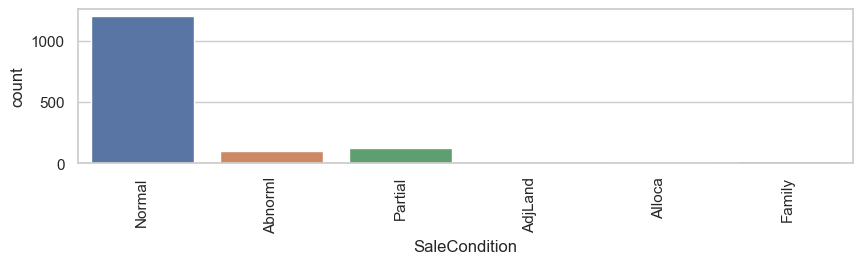

In [56]:
for i in df[dtype_obj]:
    plt.figure(figsize = (10, 2))
    g = sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.tight_layout


Let's repeat that fro floats


In [57]:

dtype_float = [column for column in df.select_dtypes([float])]
print(dtype_float, '\n', 'Number of features: ', len(dtype_float))

['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 
 Number of features:  3


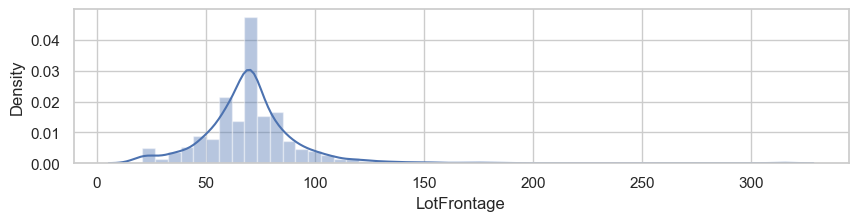

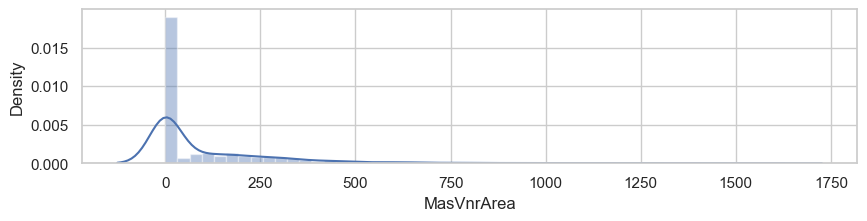

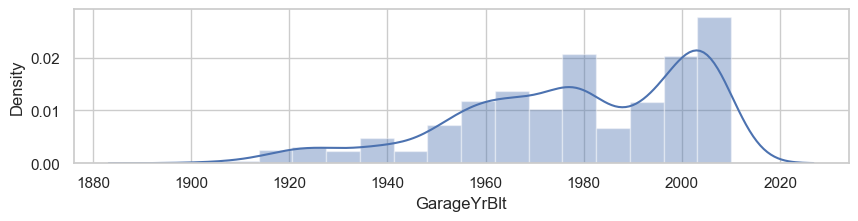

In [58]:
for i in df[dtype_float]:
    plt.figure(figsize = (10,2))
    sns.distplot(df[i])

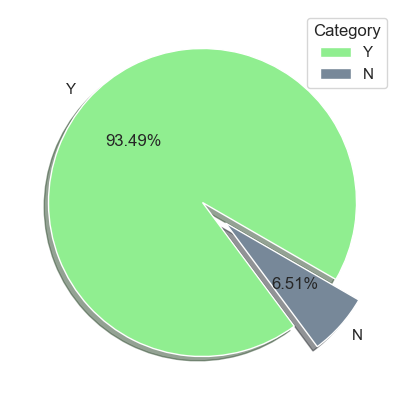

In [59]:
plt.figure(figsize=(5,5))
labels=['Y','N']
size=df['CentralAir'].value_counts()
colors=['lightgreen','lightslategray']
explode=[0,0.2]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow = True,startangle = -30,
wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels,loc="upper right",title='Category') ## used to label at the side
plt.show()

Text(0.5, 1.0, 'Bedrooms above garage level vs Central Air')

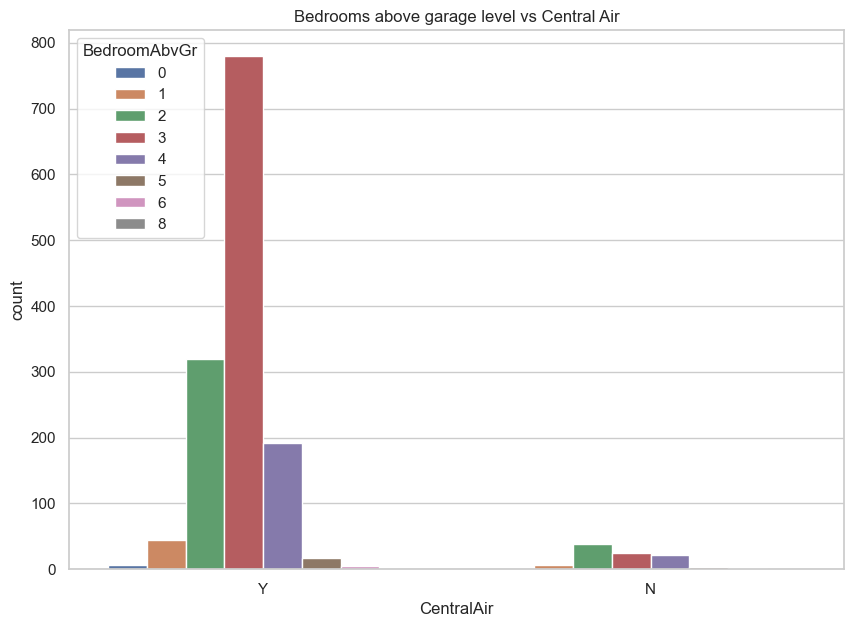

In [60]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'CentralAir', data = df, hue = 'BedroomAbvGr').set_title('Bedrooms above garage level vs Central Air')

Seems like houses with 3 bedrooms or more have Central Air Codnitioning more often


In [61]:
df.columns.sort_values(ascending = True)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle',
       'SaleCondit

### Let's look if there is any correlation between the size of garages and year they were built

<AxesSubplot:xlabel='GarageYrBlt', ylabel='GarageArea'>

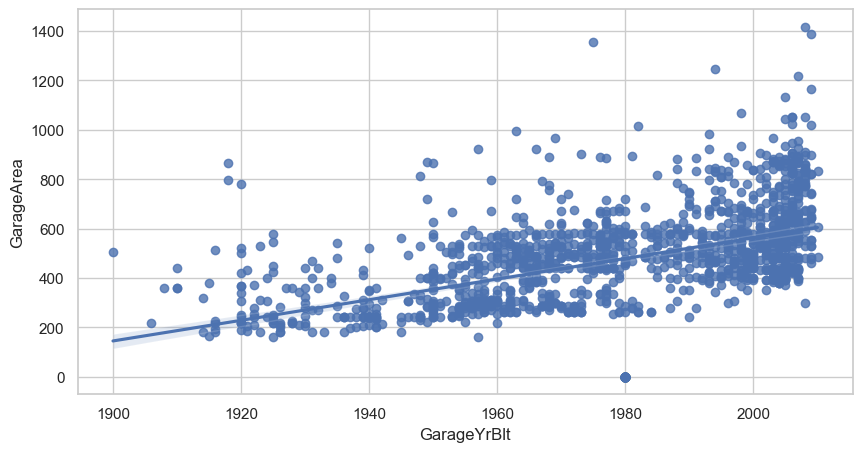

In [62]:
plt.figure(figsize = (10,5))
sns.regplot(x = 'GarageYrBlt', y = 'GarageArea', data = df)

The newer the garage, the more is the likelyhood that it will be bigger.
After building regplot, we can observe a lot of outliers


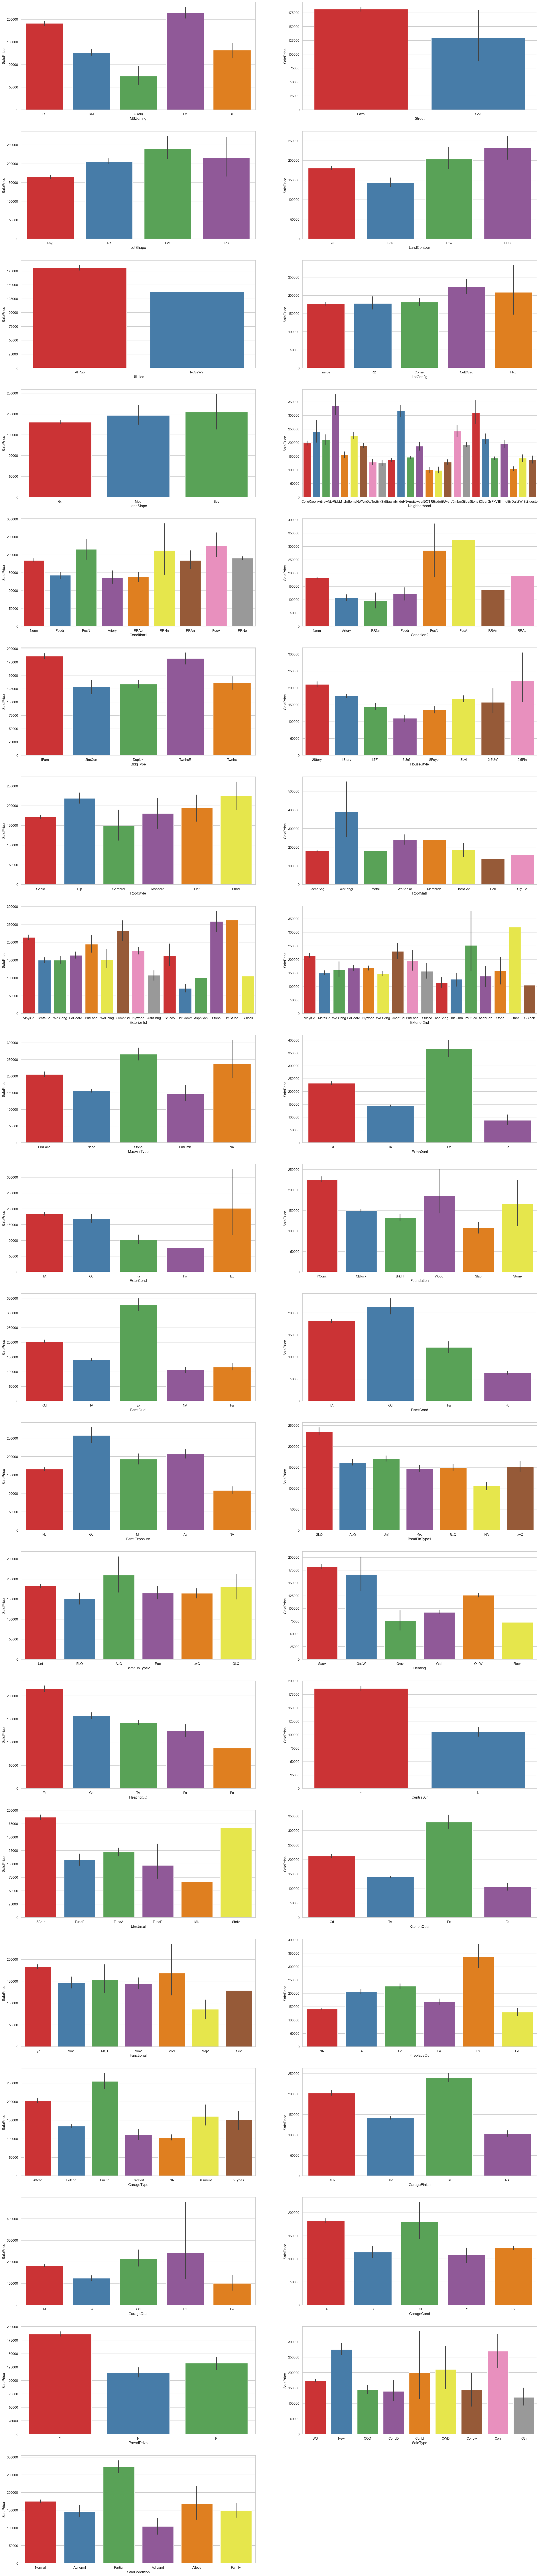

In [63]:
plt.figure(figsize=(30,150))
plotnumber = 1
for c in dtype_obj:
    ax = plt.subplot(20,2,plotnumber)
    sns.barplot(x= df[c], y = 'SalePrice', data = df, palette ='Set1')
    plotnumber+=1

### Let's look for outliers in continuous data

In [64]:
df.corr()['SalePrice'].sort_values(ascending = False)[2:10]

GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
Name: SalePrice, dtype: float64

In [65]:
box = df.corr()['SalePrice'].sort_values(ascending = False)[2:10].index.to_list()
box

['GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

<Figure size 200x200 with 0 Axes>

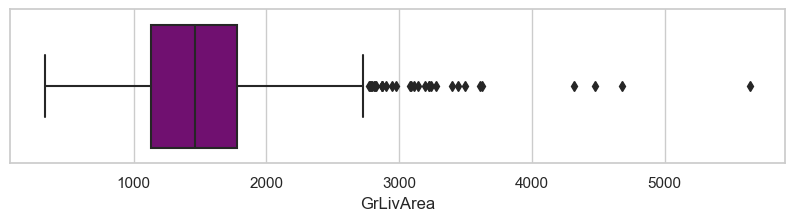

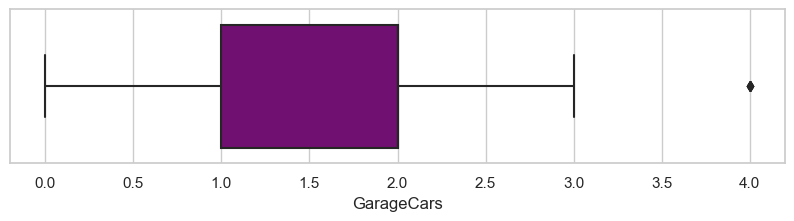

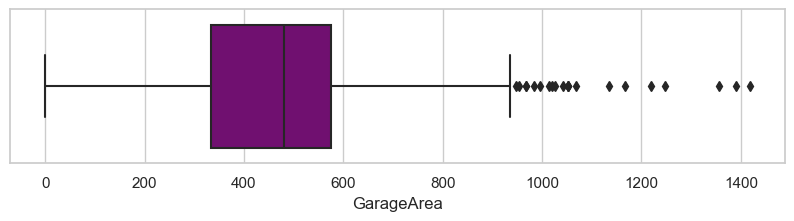

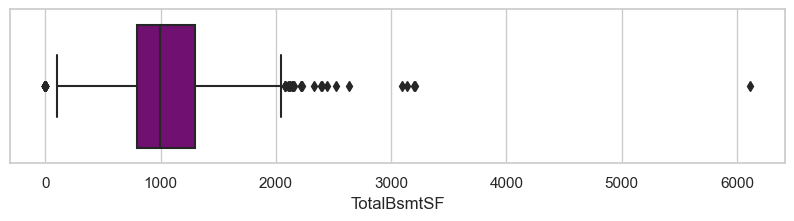

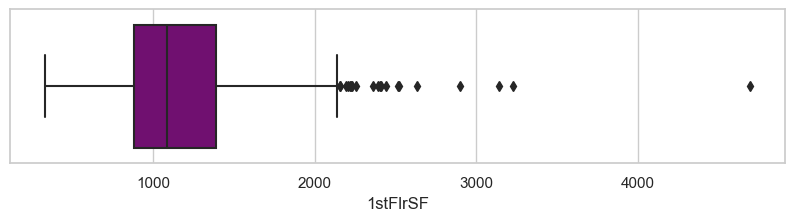

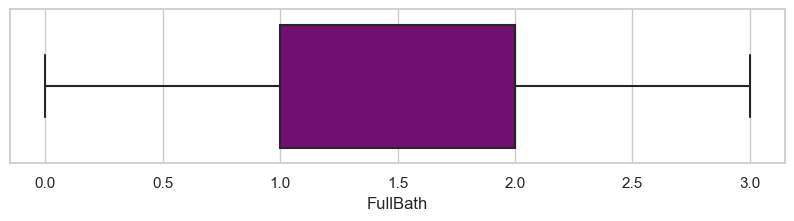

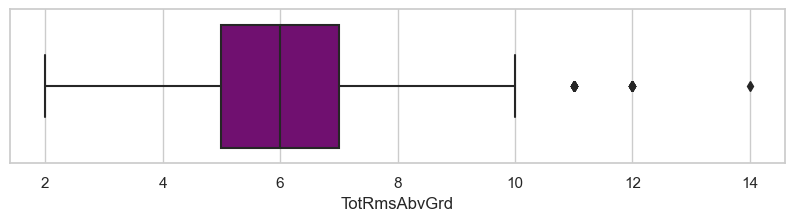

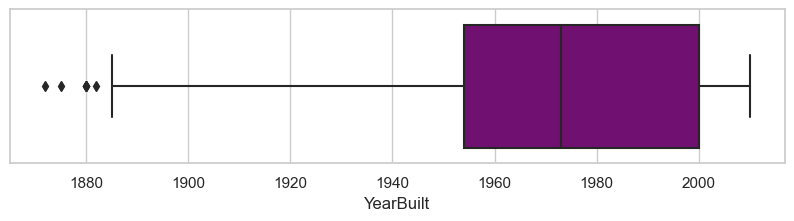

In [66]:
plt.figure(figsize=(2,2),facecolor='white')
for c in box:
    plt.figure(figsize=(10,2),facecolor='white')
    sns.boxplot(df[c],color='purple')
    plt.show()


In [67]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [68]:
df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [69]:
df.shape

(1460, 77)

In [70]:
diff_set = []
test.shape

(1459, 76)

In [71]:
for i in df.columns:
    if i not in test.columns:
        diff_set.append(i)
print(diff_set)

['SalePrice']


# Model creation

Since XGboost works perfectly fine with skewed data and is not vulnarable to outliers, we will even check the distribution
Let's start with encoding our categorical variables data

In [72]:
df
objects = df.select_dtypes(include = 'object').columns
data = df
objects

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_train = data[objects].apply(le.fit_transform)
data_train = data.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], axis = 1)
data_train = pd.concat([data_train, cat_train], axis = 1)
data_train.select_dtypes(include = 'object')
# Do the same for our test set
cat_test = test[objects].apply(le.fit_transform)
data_test = test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], axis = 1)
data_test = pd.concat([data_test, cat_test], axis = 1)
print(data_train.dtypes)
print(data_test.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
                  ...   
GarageQual         int32
GarageCond         int32
PavedDrive         int32
SaleType           int32
SaleCondition      int32
Length: 77, dtype: object
Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
                  ...   
GarageQual         int32
GarageCond         int32
PavedDrive         int32
SaleType           int32
SaleCondition      int32
Length: 76, dtype: object


We dont have to normalize or standardizate our numerical data, since XGBoost is a tree based algorithm

In [77]:
features = data_train.drop(['SalePrice'], axis = 1)
Y = data_train['SalePrice']
x_test = data_test

In [78]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [79]:
#x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size = 0.2, random_state = 3)

In [80]:
XGB = XGBRegressor().fit(features, Y)

In [81]:
ypred = XGB.predict(features)

In [82]:
#Training score
XGB.score(features, Y)

0.9995638899576966

In [ ]:
#Test score
#XGB.score(x_test, y_test)

In [83]:
predicted = pd.DataFrame(XGB.predict(x_test))
predicted

0
0    136,653.55
1    148,592.61
2    176,313.95
3    200,566.31
4    182,860.16
...         ...
1454  85,283.67
1455  86,270.83
1456 156,541.34
1457 113,364.16
1458 207,670.48

[1459 rows x 1 columns]

In [84]:
real = pd.DataFrame(y_test)

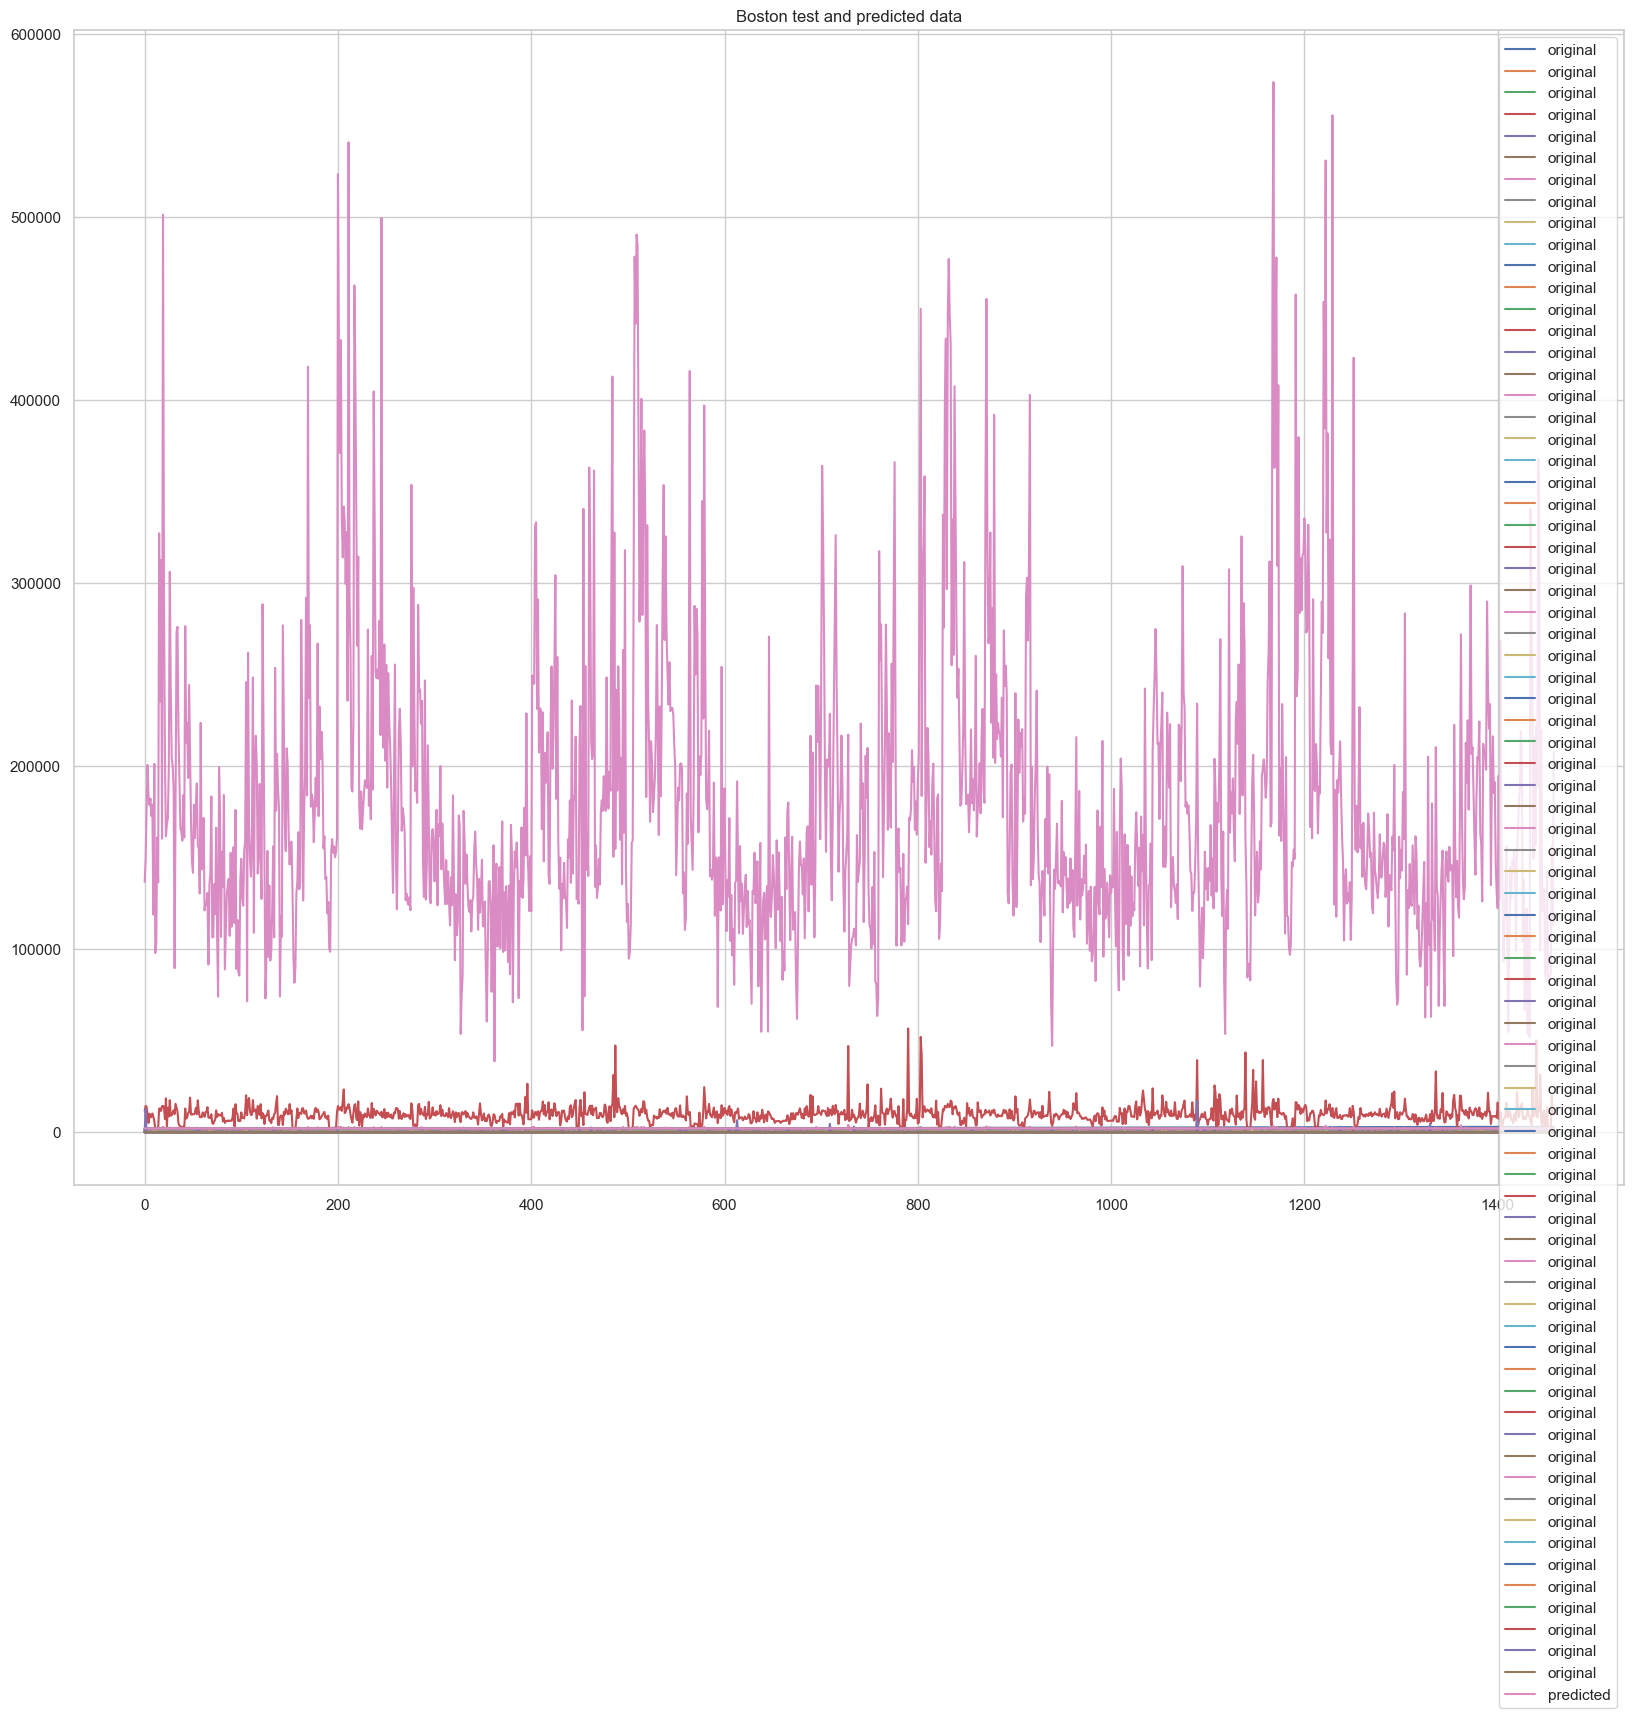

In [85]:
x_ax = range(len(real))
plt.plot(x_ax, real, label="original")
plt.plot(x_ax, predicted, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

Let's visualize our results

# Submission

In [86]:
data=pd.read_csv('input/train.csv')

In [87]:
XGB = XGBRegressor().fit(features, Y)

In [88]:
XGB_pred = XGB.predict(x_test)

In [89]:
output = pd.DataFrame({'Id': x_test.Id, 'SalePrice': XGB_pred})
output.set_index('Id')

SalePrice
Id             
1461 136,653.55
1462 148,592.61
1463 176,313.95
1464 200,566.31
1465 182,860.16
...         ...
2915  85,283.67
2916  86,270.83
2917 156,541.34
2918 113,364.16
2919 207,670.48

[1459 rows x 1 columns]

In [90]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [91]:
x_test

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20        80.00    11622            5            6   
1     1462          20        81.00    14267            6            6   
2     1463          60        74.00    13830            5            5   
3     1464          60        78.00     9978            6            6   
4     1465         120        43.00     5005            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160        21.00     1936            4            7   
1455  2916         160        21.00     1894            4            5   
1456  2917          20       160.00    20000            5            7   
1457  2918          85        62.00    10441            5            5   
1458  2919          60        74.00     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  KitchenQual  \
0          1961          1961        0.00      468.00  ...            3   
1          1958          1958      108.00      923.00  ...            2   
2          1997          1998        0.00      791.00  ...            3   
3          1998          1998       20.00      602.00  ...            2   
4          1992          1992        0.00      263.00  ...            2   
...         ...           ...         ...         ...  ...          ...   
1454       1970          1970        0.00        0.00  ...            3   
1455       1970          1970        0.00      252.00  ...            3   
1456       1960          1996        0.00    1,224.00  ...            3   
1457       1992          1992        0.00      337.00  ...            3   
1458       1993          1994       94.00      758.00  ...            3   

      Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  \
0              6            3           1             3           3   
1              6            3           1             3           3   
2              6            5           1             0           3   
3              6            2           1             0           3   
4              6            3           1             2           3   
...          ...          ...         ...           ...         ...   
1454           6            3           6             1           3   
1455           6            3           4             3           3   
1456           6            5           5             3           3   
1457           6            3           6             1           3   
1458           6            5           1             0           3   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0              4           2         8              4  
1              4           2         8              4  
2              4           2         8              4  
3              4           2         8              4  
4              4           2         8              4  
...          ...         ...       ...            ...  
1454           4           2         8              4  
1455           4           2         8              0  
1456           4           2         8              0  
1457           4           2         8              4  
1458           4           2         8              4  

[1459 rows x 76 columns]